<hr><center><font size=10>iFood Case Study: EDA for the Soul</center></font></h1>

# **Business Problem**

iFood, a leading Brazilian online food retailer, launched a series of six marketing campaigns between December 2014 and November 2016 aimed at promoting its product lines and improving customer engagement. The company’s marketing team invested €6.7 million in the final campaign and generated €3.6 million in revenue — resulting in a net loss and raising questions about targeting efficiency and return on investment (ROI).

The dataset provided represents a snapshot of 2,240 customers, including demographic information, purchasing habits across product categories, prior campaign responses, and engagement metrics such as web visits and recency of purchase.

The business challenge is that the company lacks a clear understanding of which types of customers are most likely to respond positively to marketing campaigns. Without this insight, each new campaign risks wasting resources by contacting customers who are unlikely to accept an offer, thereby increasing cost per conversion and reducing profitability.

In short, iFood needs a data-driven way to identify high-response customers before launching future campaigns to improve overall marketing ROI.

# **Objective**

The primary objective of this analysis is to:

Predict the likelihood of a customer responding to a marketing campaign, represented by the variable Response (1 = accepted, 0 = not accepted).

Supporting objectives include:

*  Performing Exploratory Data Analysis (EDA) to understand the relationships
between customer demographics, spending behavior, and campaign engagement.

*  Identifying key behavioral and demographic factors that distinguish responders from non-responders (e.g., income level, product preferences, recency, web activity).

*  Engineering features that reflect customer value and engagement — such as total spend, product mix ratios, tenure, and past campaign responsiveness.

*  Segmenting customers into actionable groups that marketing can target differently to optimize outreach.

*  Preparing a clean, model-ready dataset to train a machine learning model that can predict campaign response probability for each customer.

Ultimately, the goal is to provide iFood with insightful analytics and predictive capabilities that enable smarter targeting, reduced campaign costs, and improved profitability in future marketing initiatives.

# **Data Description**

| **Feature** | **Description** |
| ----------- | --------------- |
| ID | Unique ID to each customer |
| Year_Birth | customer's birth year |
| Education | customer's education level |
| Marital_Status | customer's marital status |
| Income | customer's yearly household income |
| Teenhome | number of teenagers in the customer's household |
| Kidhome | number of small children in the customer's household |
| DtCustomer | date of customer's enrollment with the company |
| Recency | number of days since the last purchase |
| MntWines | amount spent on wines in the last 2 years |
| MntFruits | amount spent on fruits in the last 2 years |
| MntMeatProducts | amount spent on meat products in the last 2 years |
| MntFishProducts | amount spent on fish products in the last 2 years |
| MntSweetProducts | amount spent on sweet products in the last 2 years |
| MntGoldProds | amount spend on *gold* products in the last 2 years |
| NumDealsPurchases | number of purchases made with discount |
| NumWebPurchases | number of purchases made through the company's web site |
| NumCatalogPurchases | number of purchases made using catalogue |
| NumStorePurchases | number of purchases made directly in stores |
| NumWebVisitsMonth | number of visits to company's web site in the last month |
| AcceptedCmp3 | 1 if the customer accepted the offer in the third campaign, 0 if otherwise |
| AcceptedCmp4 | 1 if the customer accepted the offer in the fourth campaign, 0 if otherwise |
| AcceptedCmp5 | 1 if the customer accepted the offer in the fifth campaign, 0 if otherwise |
| AcceptedCmp1 | 1 if customer accepted the offer in the first campaign, 0 if otherwise |
| AcceptedCmp2 | 1 if the customer accepted the offer in the second campaign, 0 if otherwise |
| Complain | 1 if the customer complaineed in the last 2 years |
| Z_CostContact | the cost of each marketing contact |
| Z_Revenue | total revenue per campaign |
| Response (target) | 1 if the customer accepted the offer in the last campaign, 0 if otherwise |

# **Importing the necessary libraries**

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np
from datetime import date, datetime

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for hypothesis testing metrics
import scipy.stats as stats
import math
from scipy.stats import binom, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
# Setting options to show the entire output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# **Importing the Dataset**

In [4]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing the data and reading it into a dataframe
data = pd.read_csv('/content/drive/MyDrive/Datasets/ml_project1_data.csv')

In [6]:
# Making a copy of the data
df = data.copy()

# **Data Overview**

In [7]:
# Displaying the first 5 rows of data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
# Getting the shape of the data
df.shape

(2240, 29)

* There are 2240 rows and 29 columns in the dataset

## **Checking the data types**

In [9]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* We've got 26 numerical values and 3 objects
* Looks like we've got a few missing values in the Income variable. We'll investigate and decide how to treat later.

## **Statistical Summary**

### **Numeric Summary**

In [10]:
# Checking the numerical statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


* There may be some anomylous values in Income since there is such a large gap between the 75th percentile and the max (~540,000). We'll take a look at the distribution before deciding if it is truly an outlier or a typo.
* These look to be relatively small families with an average of just .4 kids and .5 teens - it could be that most of the only have 1 child.
* It seems the average customer makes a purchase about every month and a half with the mean recency being 49.
* Wine and Meats are their top 2 product categories with the average customer spending ~300 on wine per year and ~160 on meats in the past 2 years. That's about 7x and 4x the next closest product category (Gold Products).
* With an average customer making about 2 purchases of items on deal and a max of 15, this implies there may be some customers who are very value-focused and cherry picking items on sale. It will be very interesting to see how this customer behaves differently than the average customer.
* At a glance, it seems the business between online and instore sales is fairly balanced, leaning slightly more towards instore. It will be interesting to see how store sales and web sales align with and web site visits.
* Catalog sales will also be very interesting as well to see how those customers that make catalogue purchases also spend money online and instores, as well as if they visit the web site at all.
* Other than campaign 2, it seems most of the previous campaigns had fairly similar acceptance rates of ~6-7%. It might be worth our while to combine the values of these columns to understand how many times on average we had to contact a customer before they accepted an offer.
* The Complain variable looks to be extremely low (a great thing for the business), so it may end up that variable is so intuitive that we may not need it.
* There is only one value in both Z_CostContact and Z_Revenue, 3 and 11 respectively. From online research, I've found that 3 is the scaled cost per customer contact for the last campaign, and 11 is the scaled and distributed revenue from the last campaign. We'll use 3 as the constant cost of contact, and we'll calculate scaled revenue by customer using 11 as the revenue generated per accepted offer.



### **Categorical Summary**

In [11]:
# Getting the statistical summary for the categorical variables
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,2012-08-31,12


* About half of our customers claim "Graduation" as their Education level.
* About a third of the dataset is "Married".
* There are 663 unique values in the Dt_Customer variable.

## **Duplicate Value Check**

In [12]:
# Checking the dataset for duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicated values in the dataset

## **Missing Value Check**

In [13]:
# Checking for missing values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


* We've got 24 missing values in the Income variable, but we'll dive deeper into that variable in Univariate Analysis before we decide how to deal with it.

# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Utility Functions**

In [14]:
# Function to plot a boxplot and histogram along the same scale
def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    title: optional title for the plot
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="skyblue"
    )

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()

    # Add title if provided
    if title:
        f2.suptitle(title, fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()



In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Numeric Data Exploration**

#### **ID**

In [16]:
# Calculating the number of unique values in the ID variable
df['ID'].nunique()

2240

* We've confirmed that the ID variable is unique to each customer in the dataset, and therefore is not needed.

In [17]:
# Dropping the ID column from the dataset
df.drop('ID', axis=1, inplace=True)

#### **Year_Birth**

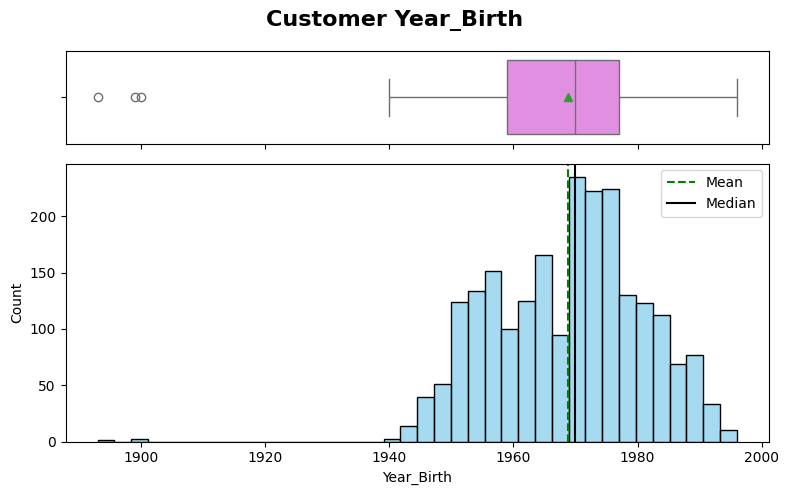

In [18]:
# Plotting the distribution of Year_Birth
histogram_boxplot(df, 'Year_Birth', title='Customer Year_Birth')

* The distribution for birth year looks to be pretty normally distributed with the exception of our outliers.
* Our customers (with exception of the outliers) range in age from 30 to 85.
* I believe our outliers are probably pulling our mean backwards a bit, and it's HIGHLY unlikely that we have customers around 125 or more years old.
* Let's dig into those customers a bit.

In [19]:
# Creating a dataframe of old folks from the Year_Birth column
old_df = df[df['Year_Birth']<1920]
old_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


* I can't be sure what exactly happened in each instance, but I'm going to guess that 1893 and 1899 should be 1983 and 1989 respectively. We'll update those two in that fashion.
* For the 1900 birth year, we will simply replace with the median (but we'll have to do this during preprocessing after splitting the data into train and test to avoid data leakage).

In [20]:
# Replacing the year birth outliers as described above
df['Year_Birth'].replace(1893, 1983, inplace=True)
df['Year_Birth'].replace(1899, 1989, inplace=True)

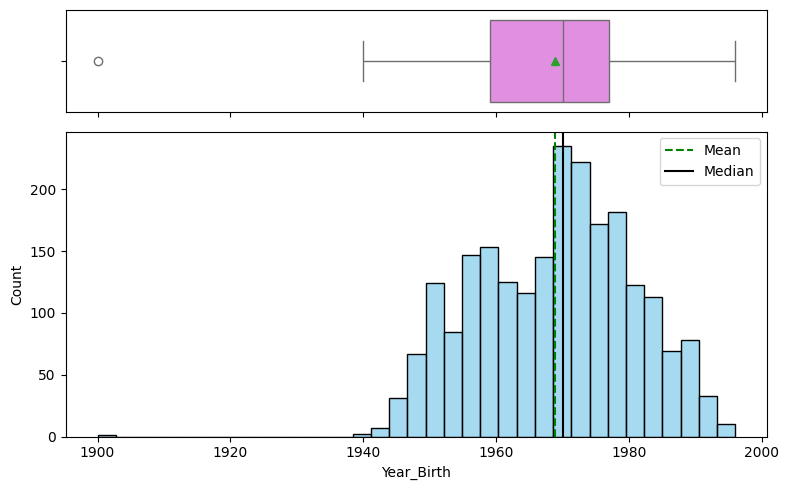

In [21]:
# Double checking the distribution after handling outliers
histogram_boxplot(df, 'Year_Birth')

* This looks much more plausible (with the exception of our one outlier):. However, it's unwieldy to look at birth year, let's replace Year_Birth with Customer_Age.
* After a little research, I found this dataset was compiled in 2017, so we'll use that date to determine age.

In [22]:
# Replacing Year_Birth with Customer_Age by subtracting Year_Birth from 2025
df['Customer_Age'] = 2017 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

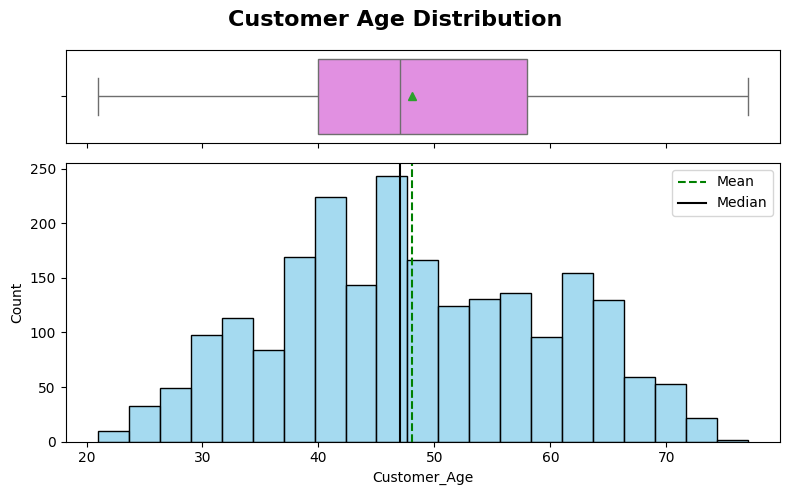

In [23]:
# Plotting the distribution of Customer_Age
histogram_boxplot(df[df['Customer_Age'] < 100], 'Customer_Age', title='Customer Age Distribution')

* Much easier to look at. However, now we may have some anomylous values on the other side. Let's take a look at the minimum age.

In [24]:
# Calculating the minimum age of the Customer_Age variable
df['Customer_Age'].min()

21

In [25]:
# Isolating that instance of age being 14
df[df['Customer_Age']==14]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age


* We'll keep these two records flagged for now. It's not legal to be married or purchase wine in Brazil under the age of 18.

#### **Income**

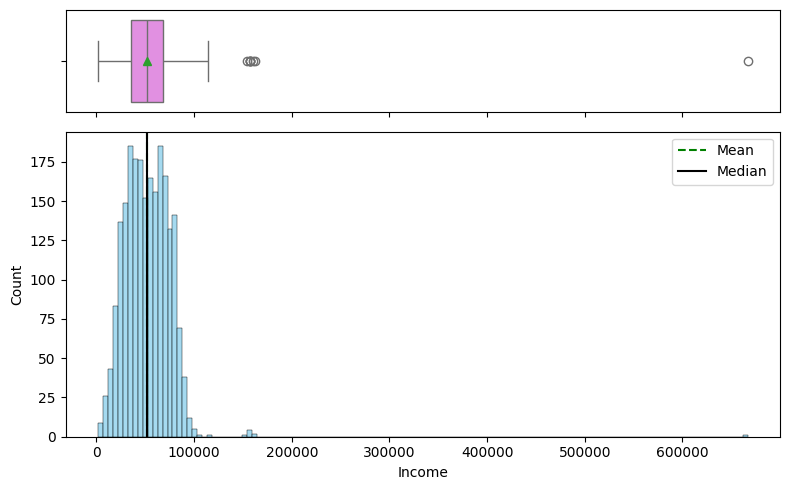

In [26]:
# Plotting the distribution of the Income column
histogram_boxplot(df, 'Income')

* As I suspected, the max value for this column is very much an outlier. Let's take a look at the distribution without that one instance.

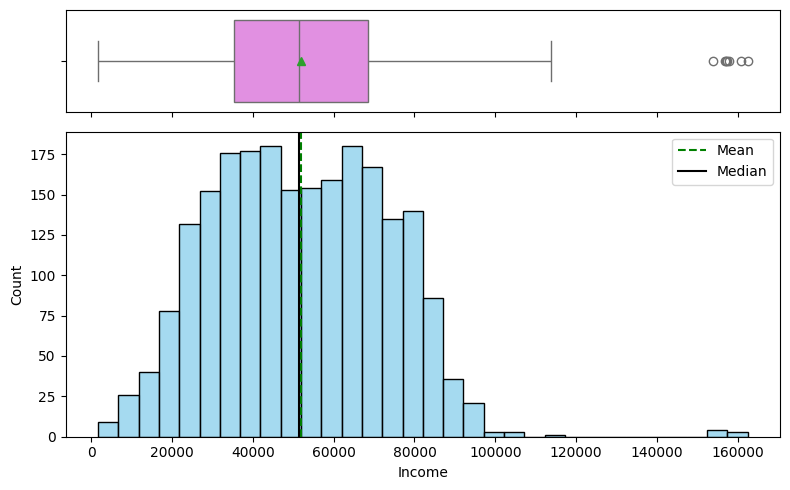

In [27]:
# Plotting the distribution of Income without the outlier
histogram_boxplot(df[df['Income']<600000], 'Income')

* This looks much more realistic. We're going to assume that 666,666 is a typo and should be 66,666.

In [28]:
# Updating the Income value to 66,666 where it equals 666,666
df['Income'].replace(666666, 66666, inplace=True)

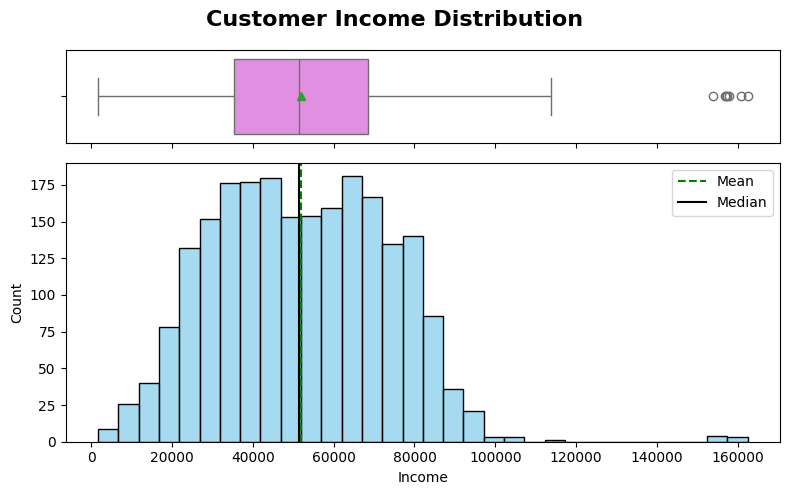

In [29]:
# Double checking our distribution again
histogram_boxplot(df, 'Income', title="Customer Income Distribution")

* Very good. Most of our customers make between 20,000 - 80,000 per year.
* However, we had some missing values, let's take a look at those before moving on.

In [30]:
df[df['Income'].isnull()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age
10,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,34
27,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,31
43,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,58
48,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,66
58,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,35
71,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,44
90,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,60
91,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,60
92,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0,44
128,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,56


* There is some really great information here. We'll bin up income later on and see if these customers behave differently than other income bins.

#### **KidHome**

* Though KidHome is numeric, we'll use the labelled barplot since there are not many unique values.

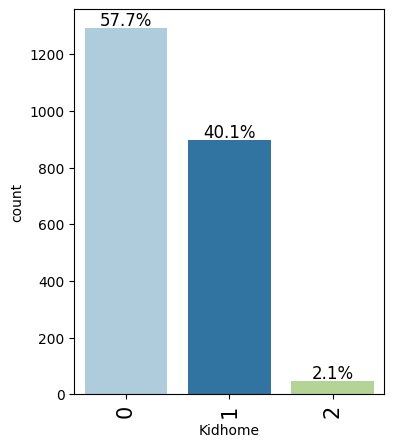

In [31]:
# Plotting the distribution of KidHome
labeled_barplot(df, 'Kidhome', perc=True)

* Very few of our customers have young 2 young children at home - only ~2%
* Over half of our customers do not have any young children at home - ~57%

#### **TeenHome**

* Again, we'll use the labeled barplot here as it seems more categorical than numerical.

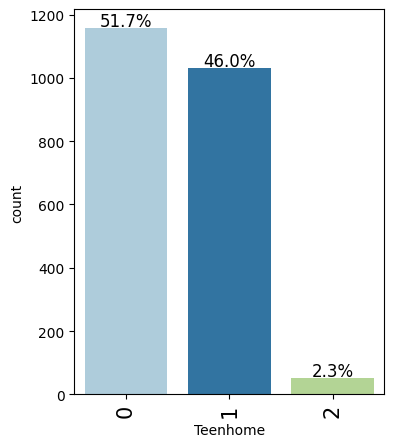

In [32]:
# Plotting the distribution of TeenHome
labeled_barplot(df, 'Teenhome', perc=True)

* Again, very similar distribution for teens in homes.
* I wonder now, what are the different combinations of children in each household. Let's dig in.

#### **Total Children**

In [33]:
# Creating a variable for Total Children
total_children_df = df.copy()
total_children_df['Total_Children'] = total_children_df['Kidhome'] + total_children_df['Teenhome']

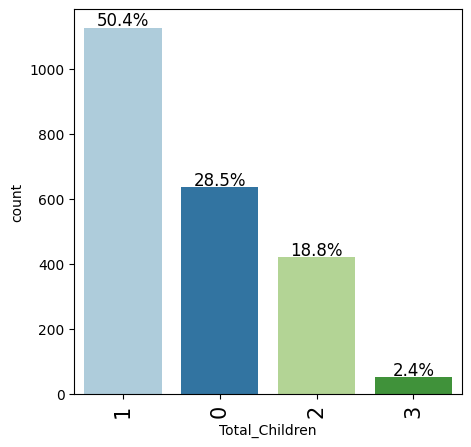

In [34]:
# Plotting the distribution for Total Children
labeled_barplot(total_children_df, 'Total_Children', perc=True)

* I believe this will end up being a very helpful column as the distributions for Kidhome and Teenhome were a bit misleading.
* Just about half of our customers have 1 child at home.
* Though 50%+ of our customers reported having no kids and 50%+ reported having no teens, only 28% of our customers have no children at all.
* Though only ~2% of our customers reported having 2 kids or 2 teens, ~19% of our customers have 2 children.
* Now we've also added a value of 3 children per household that comes in ~2%.
* We'll add this column to our original df during Feature Engineering

#### **Recency**

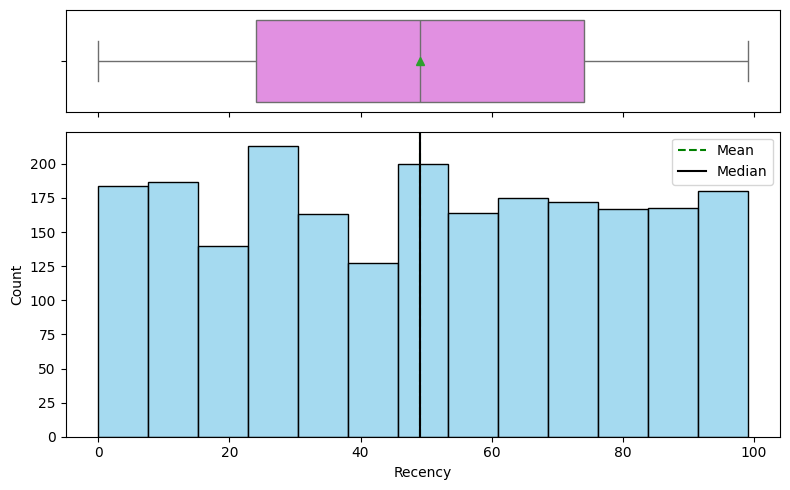

In [35]:
# Plotting the distribution for Recency
histogram_boxplot(df, 'Recency')

* Recency appears to have a fairly uniform distribution. This variable may become much more helpful in Bivariate analysis.
* Number of days since last purchase ranges from 0 - 99, but no bins jump out as telling a story.

#### **MntWines**

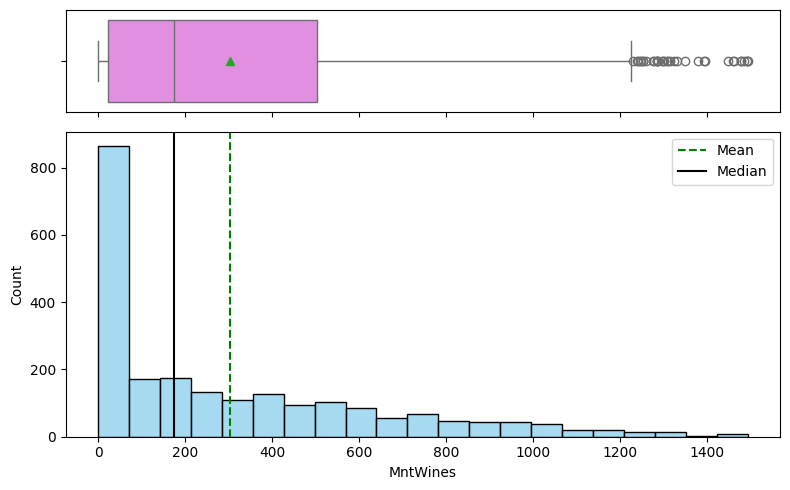

In [36]:
# Plotting the distribution for MntWines
histogram_boxplot(df, 'MntWines')

* Our wine distribution is very positive skewed with the mean being larger than the median.
* It seems about a third of our customers are not wine drinkers or buy very little wine from us.
* This variable contains multiple outliers, but the distribution has a long downsloping tail implying the outliers are legitimate.

#### **MntFruits**

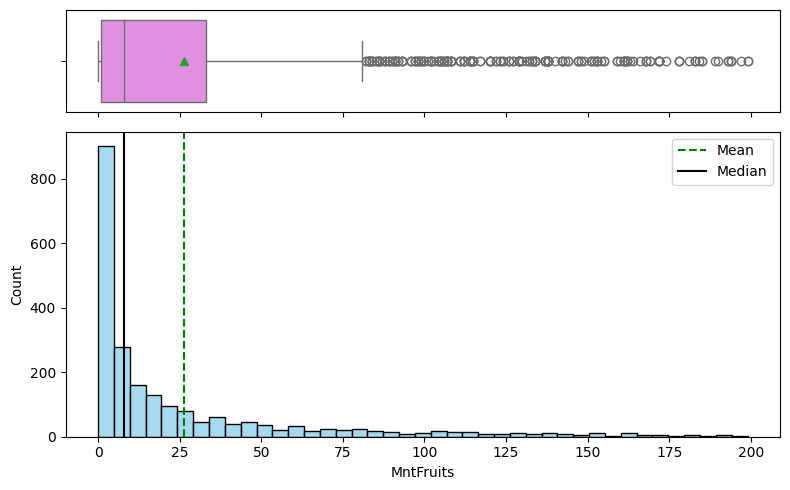

In [37]:
# Plotting the distribution for MntFruits
histogram_boxplot(df, 'MntFruits')

* Again, our fruits distribution is highly positive-skewed and the mean is much larger than the median.
* About a third of our customers purchase less than $5 of fruit from us.
* The long sloping nature of the distribution implies that the outliers are legitimate data points.

#### **MntMeatProducts**

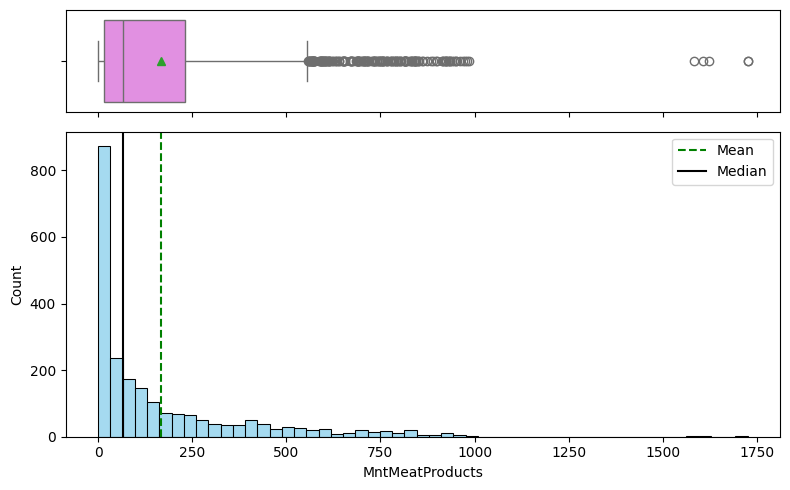

In [38]:
# Plotting the distribution of MntMeatProducts
histogram_boxplot(df, 'MntMeatProducts')

* The meats distribution is highly positive-skewed and the mean is much larger than the median.
* About a third of our customers purchase less than ~$30 of meat from us.
* The long sloping nature of the distribution implies that the outliers are legitimate data points except the few at the end. Let's dig into those a bit.

In [39]:
# Isolating the part of the dataset for the MntMeatProducts > 1500
meat_eaters_df = df[df['MntMeatProducts']>1500]
meat_eaters_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age
21,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,38
164,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,44
687,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,35
1653,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,40
2228,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,39


* For the most part, this looks pretty legitimate with the exception of the first instance. It's highly unlikely that a person that makes 2447 per year with a university degree and one child at home spent more than 1500 per year on meat.

In [40]:
# Getting the MntMeatProduct value from the first row of this dataset
meat_eaters_df['MntMeatProducts'].iloc[0]

np.int64(1725)

* I'm inclinded to believe that there may be a typo in the income for this particular row. Let's see how much this person has spent with our stores vs. total income.

In [41]:
# Getting the sum of all the Mnt columns for the first row of this dataset
meat_eaters_df.iloc[0][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

np.int64(1730)

* This too seems highly unlikely that they spent 1725 on meat, but only 5 in other categories. Let's see if this purchasing behavior may hold up for similar customers.

In [42]:
# Creating a dataframe of our customers with the lowest incomes and the amounts they spent for each category
low_income_df = df[df['Income']<3000]
low_income_df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
21,2447.0,1,1,1725,1,1,1
1245,1730.0,1,1,3,1,1,1


* It's clear to me that this particular case is indeed a nonsensical outlier. There is obviously either a typo in income or MntMeatProducts value, but since we can't be sure which it is, I believe it's safest to drop this from the dataset all together.

In [43]:
# Dropping index row 21 from the df dataset and resetting the index
df.drop(21, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

* We've taken care of the anomoly, but we'll keep the other outliers as they seem they may be legitimate.

#### **MntFishProducts**

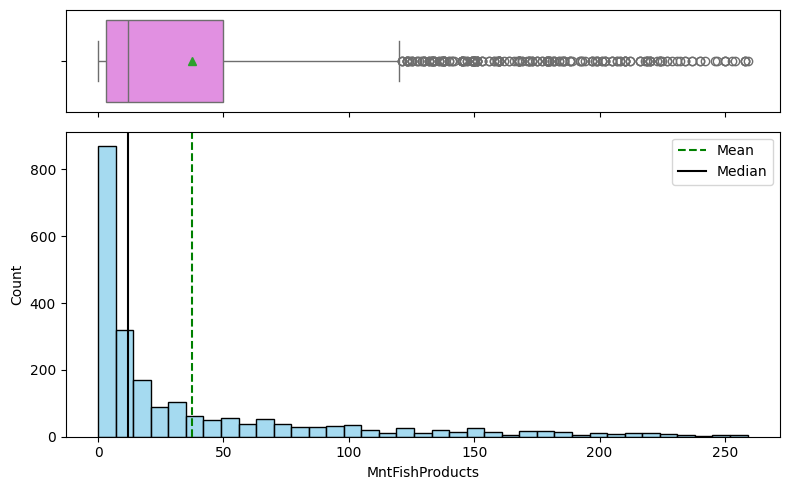

In [44]:
# Plotting the distribution for MntFishProducts
histogram_boxplot(df, 'MntFishProducts')

* The fish distribution is highly positive-skewed and the mean is much larger than the median.
* About a third of our customers purchase less than ~$7 of fish from us.
* The long sloping nature of the distribution implies that the outliers are legitimate data points.

#### **MtnSweetProducts**

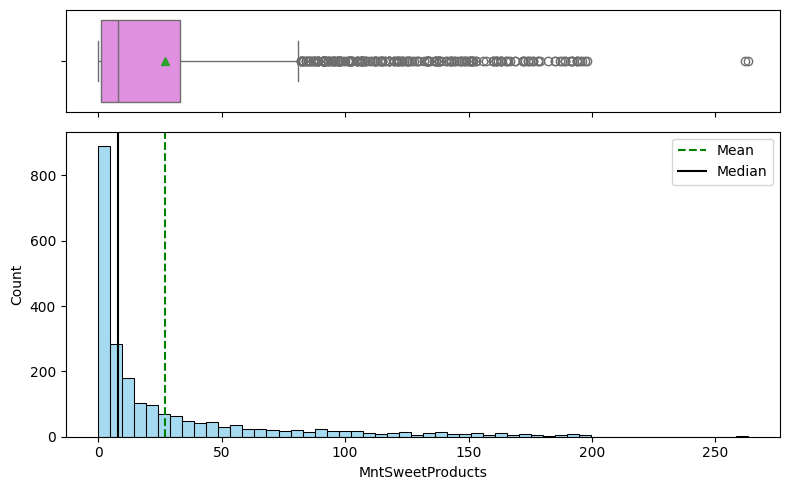

In [45]:
# Plotting the distribution for MntSweetProducts
histogram_boxplot(df, 'MntSweetProducts')

* The sweets distribution is highly positive-skewed and the mean is much larger than the median.
* About a third of our customers purchase less than ~$5 of sweets from us.
* The long sloping nature of the distribution implies that the outliers are legitimate data points except the few at the end. Let's dig into those a bit.

In [46]:
# Creating a dataframe for the outliers in the MntSweetProducts
sweet_eaters_df = df[df['MntSweetProducts']>250]
sweet_eaters_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age
26,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,31
1897,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0,72


* Funny enough, I don't see anything throwing up red flags here. These could legitimately be customers with a ravenous sweet tooth. Also, since we have datapoints leading all the way up to 200, it's not a far cry for a few customers to spend a little over 250 - we'll leave them in.

#### **MntGoldProducts**


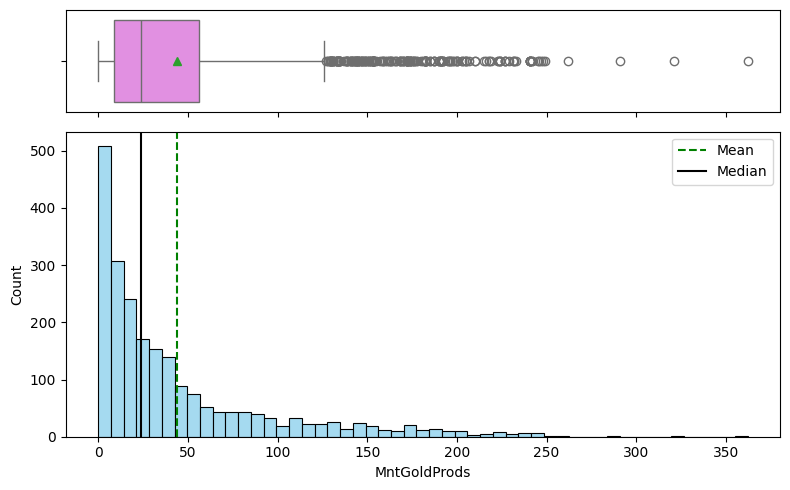

In [47]:
# Plotting the distribution for MntGoldProducts
histogram_boxplot(df, 'MntGoldProds')

* Again, highly right-skewed with a long sloping tail leading to multiple outliers that all seem legitimate at a glance.
* About a quarter of our customers spend less than ~$7 on Gold products.

#### **NumDealsPurchases**

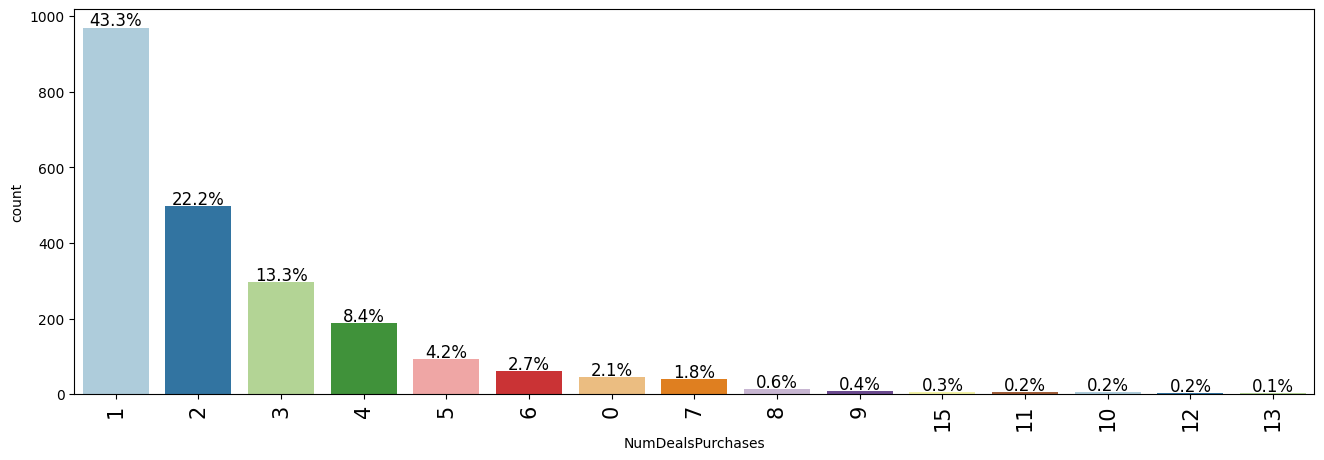

In [48]:
# Plotting the distribution of NumDealsPurchases
labeled_barplot(df, 'NumDealsPurchases', perc=True)

* It seems the majority of our customers only purchase 1 to 2 products on promotion (~65%).
* Only about 2% of our customers purchase 8 or more products on promotion.

#### **NumWebPurchases**

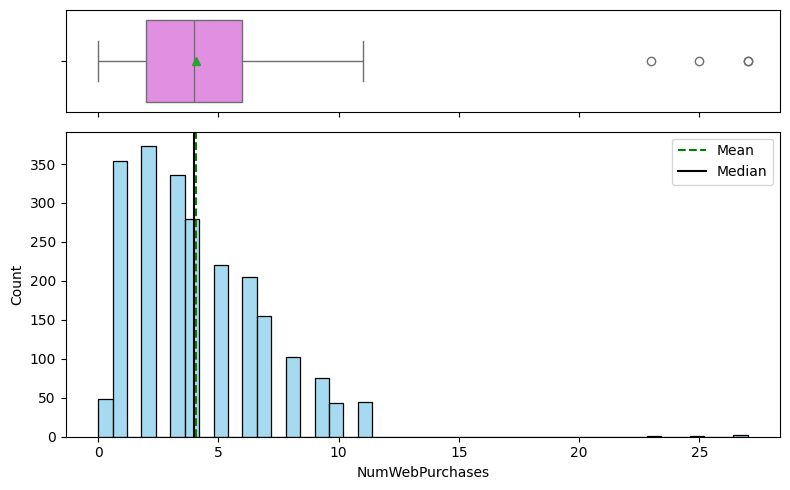

In [49]:
# Plotting the distribution of NumWebPurchases
histogram_boxplot(df, 'NumWebPurchases')

* The distribution for web purchases is almost normally distributed with the exception of the 3 outliers making this very right-skewed.
* The majority of our customers made fewer than 5 web purchases from us.
* We'll dig into the outliers a little more.

In [50]:
# Creating a dataframe for the web spenders
web_spenders_df = df[df['NumWebPurchases']>20]
web_spenders_df[['NumWebPurchases', 'NumWebVisitsMonth']]

,NumWebPurchases,NumWebVisitsMonth
26,27,1
1805,23,0
1897,27,1
1974,25,1


* This seems HIGHLY unlikely, but could be plausible given that NumWebPurchases may be lifetime number of purchases where NumWebVisitsMonth is only within the last month.
* To get a better handle on this, let's look at NumWebVisitsMonth next.

#### **NumWebVisitsMonth**

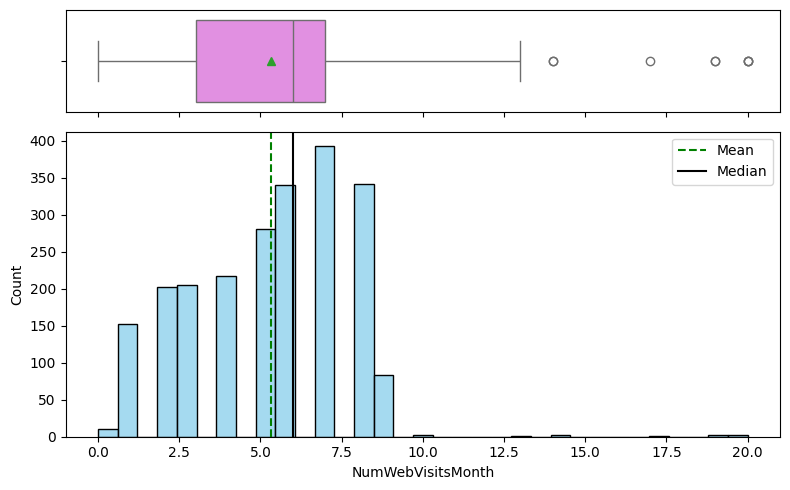

In [51]:
# Plotting the number of web visits distribution
histogram_boxplot(df, 'NumWebVisitsMonth')

* Very interesting that the distribution of NumWebVisitsMonth is nearly opposite NumWebPurchases.
* Nearly all of the data falls between 0-10 web visits per month.
* The distribution is normal for the most part with a slight left skew if not for the outliers.
* Let's dig in.

In [52]:
# Creating a dataframe for web shoppers
web_shoppers_df = df[df['NumWebVisitsMonth']>12]
web_shoppers_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age
9,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,67
773,PhD,Together,6835.0,0,1,2012-12-08,76,107,2,12,2,2,12,0,0,0,1,20,0,0,0,0,0,0,3,11,0,60
980,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,52
1041,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,26
1244,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,46
1327,Master,Single,6560.0,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,3,11,0,35
1523,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,44
1845,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,54
2213,Graduation,Married,5305.0,0,1,2013-07-30,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,3,11,0,41


* Interesting that these are all lower income customers, and that 3 of the 9 have purchase 15 items on promotion.
* I don't see any red flags that these values might not be true, so we'll leave these outliers as they are.

#### **NumCatalogPurchases**

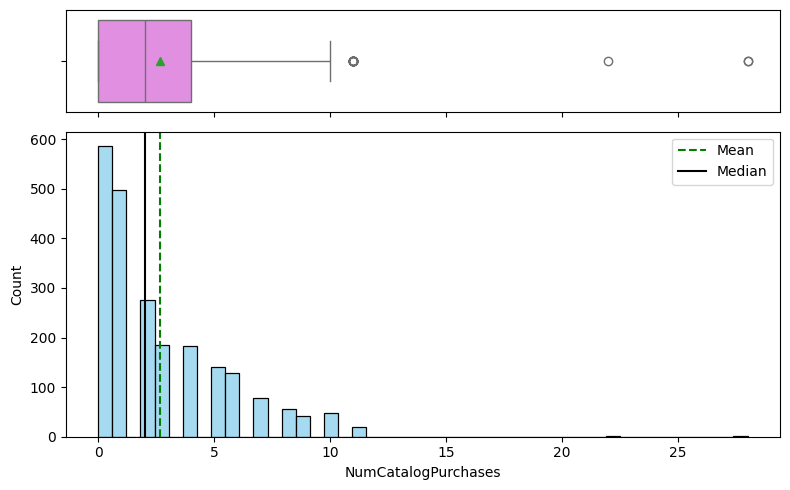

In [53]:
# Plotting the distribution for NumCatalogPurchases
histogram_boxplot(df, 'NumCatalogPurchases')

* Very right-skewed distribution, with very few of our customers bying more than 5 items from the catalogue.
* There are some extreme outliers we'll need to dig into.

In [54]:
# Creating a dataframe for Catalog Buyers
catalog_buyers_df = df[df['NumCatalogPurchases']>15]
catalog_buyers_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age
163,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,44
686,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,35
1652,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0,40


* I can't say this looks anomylous. All are high income earners of approximately middle age, and surprisingly, 2 of the 3 bought 15 items on promotion.
* We'll leave these outliers as they are.

#### **NumStorePurchases**

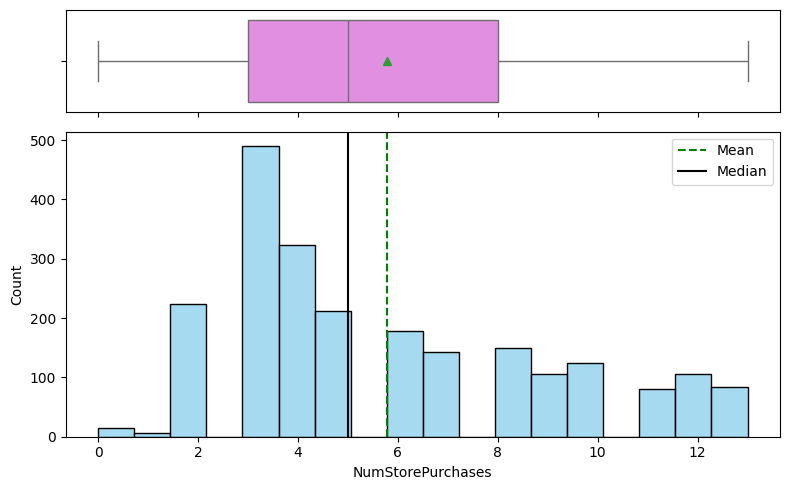

In [55]:
# Plotting the distribution of NumStorePurchases
histogram_boxplot(df, 'NumStorePurchases')

* No outliers in this variable.
* Most of our customers purchased between 3 and 8 items in our stores.
* The distribution is a bit right-skewed with the largest value counts around 3-5 purchases.

#### **AcceptedCmp1**

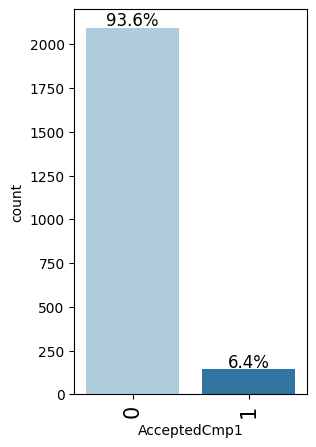

In [56]:
# Plotting the distribution for Campaign 1
labeled_barplot(df, 'AcceptedCmp1', perc=True)

* Easy enough - 93.6% of our customers rejected the first campaign offer while 6% accepted it.

#### **AcceptedCmp2**

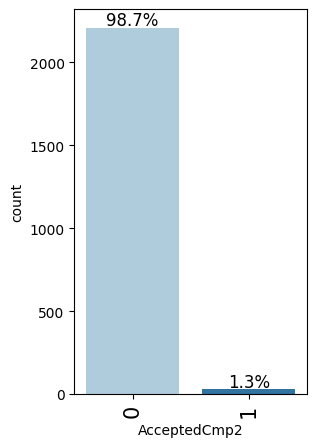

In [57]:
# Plotting the distribution for AcceptedCmp2
labeled_barplot(df, 'AcceptedCmp2', perc=True)

* This was the worst performing of the campaigns. Only 1.3% accepted it.

#### **AcceptedCmp3**

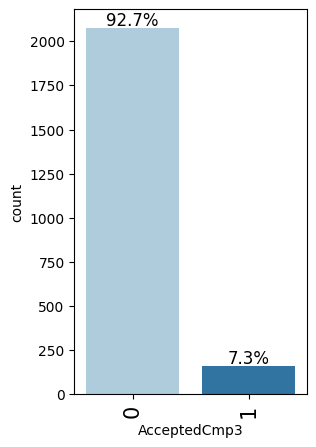

In [58]:
# Plotting the distribution of AcceptedCmp3
labeled_barplot(df, 'AcceptedCmp3', perc=True)

#### **AcceptedCmp4**

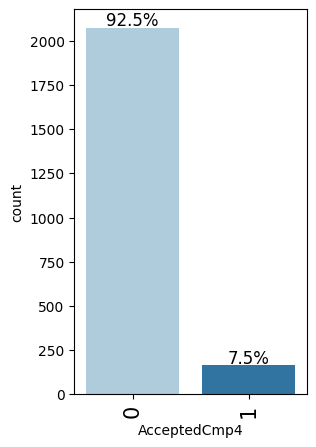

In [59]:
# Plotting the distribution for AcceptedCmp4
labeled_barplot(df, 'AcceptedCmp4', perc=True)

#### **AcceptedCmp5**

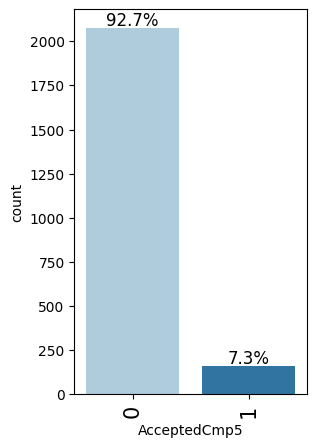

In [60]:
# Plotting the distribution for AcceptedCmp5
labeled_barplot(df, 'AcceptedCmp5', perc=True)

#### **Complain**

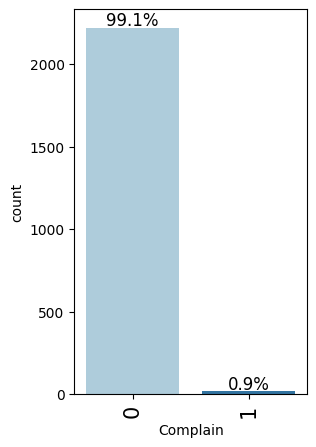

In [61]:
# Plotting the distribution of Complain
labeled_barplot(df, 'Complain', perc=True)

* Pretty good track record if less than 1% complained about our service.

#### **Response**

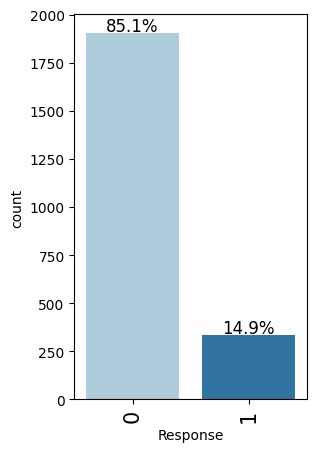

In [62]:
# Plotting the distribution for Response
labeled_barplot(df, 'Response', perc=True)

* As noted in the business context, this has been their most successful campaign to date, with ~15% acceptance rate.
* Let's make a dataframe for each campaign and compare the statistics in Bivariate Analysis.

#### **Z_CostContact & Z_Revenue**

* As noted earlier, Z_CostContact is a constant value of 3 per contact. We'll use that in determining ROI, but we don't need the column.
* We'll use the value "11" from the Z_Revenue column as the constant value for offer acceptance, but for now, we don't need this column either.

In [63]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### **Categorical Data Exploration**

#### **Education**

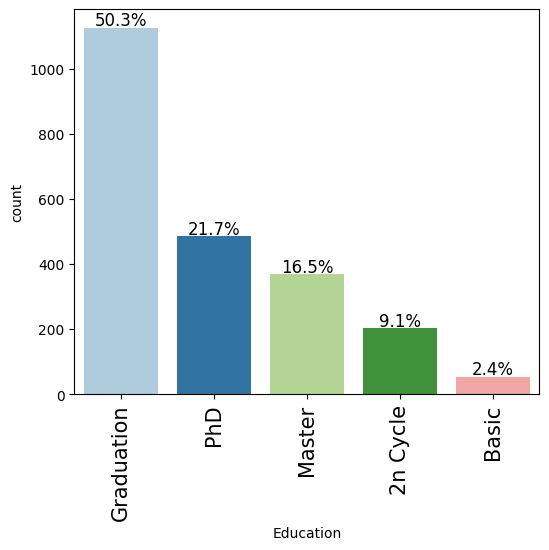

In [64]:
# Plotting the distribution for Education
labeled_barplot(df, 'Education', perc=True)

* We have a highly educated customer base with 89% having a university degree or higher, and only about 11% having a high school education or lower.
* We'll encode this ordinally to help the model in training, but not until Preprocessing.

#### **Marital_Status**

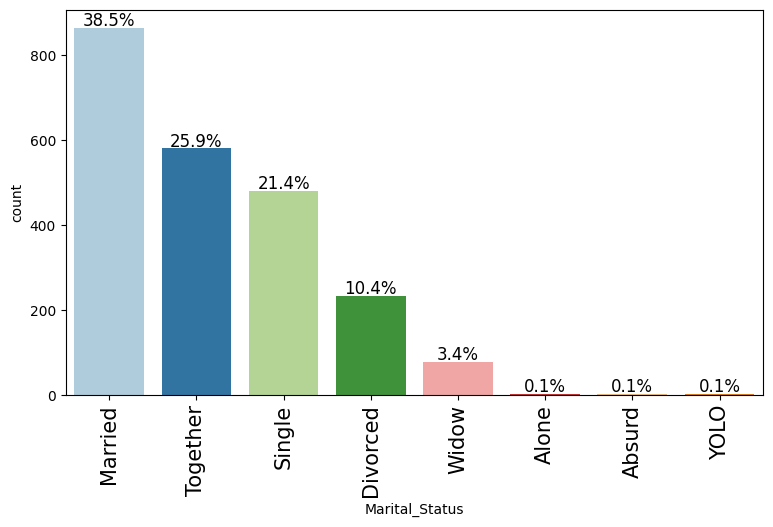

In [65]:
# Plotting the distribution for Marital Status
labeled_barplot(df, 'Marital_Status', perc=True)

* Obviously, we don't know what "Alone", "Absurd", and "YOLO" mean, so we'll combine those into a value as "Undeclared" during Feature Engineering.
* Otherwise, the largest category of marital status is Married at ~38.5%.

#### **Dt_Customer**

In [66]:
# Listing the number of unique values in Dt_Customer
df['Dt_Customer'].nunique()

663

* There are 663 unique values in Dt_Customer variable, and all are an integer.
* First, let's convert to datetime.

In [67]:
# Converting the Dt_Customer variable to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

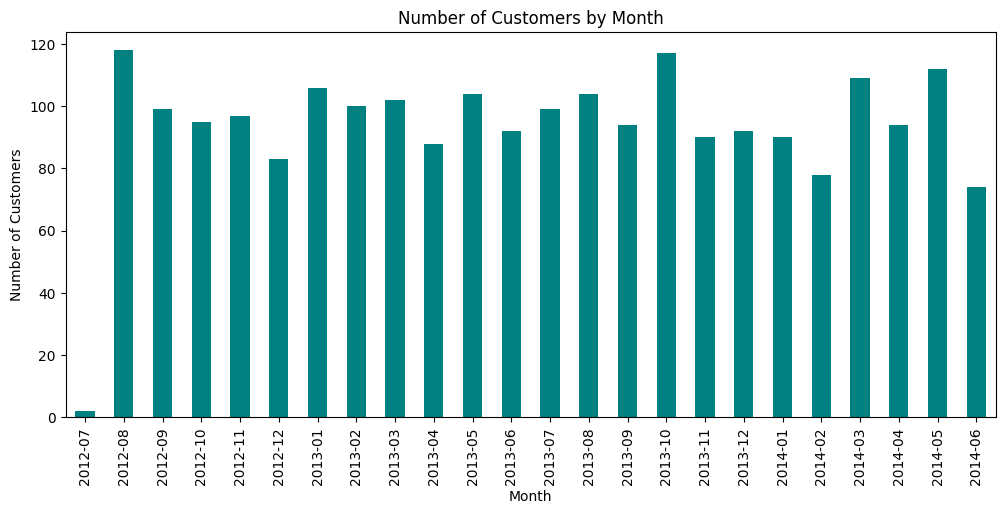

In [68]:
# Visualizing the distribution Dt_Customer
monthly = df['Dt_Customer'].dt.to_period('M').value_counts().sort_index()
monthly.plot(kind='bar', figsize=(12, 5), color='teal')
plt.title('Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

* I don't see any visible patterns here other than it looks like acquisition tends to drop off a bit in the cooler months of the year.

## **Bivariate Analysis**

* Quick little cleanup step to move campaigns to the end of the dataframe.

In [69]:
# Creating a list of the columns I want to move
columns_to_pop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']

# Creating a loop to move them to the back of the dataframe
for col in columns_to_pop:
    df[col] = df.pop(col)

### **Correlation of Numeric Variables**

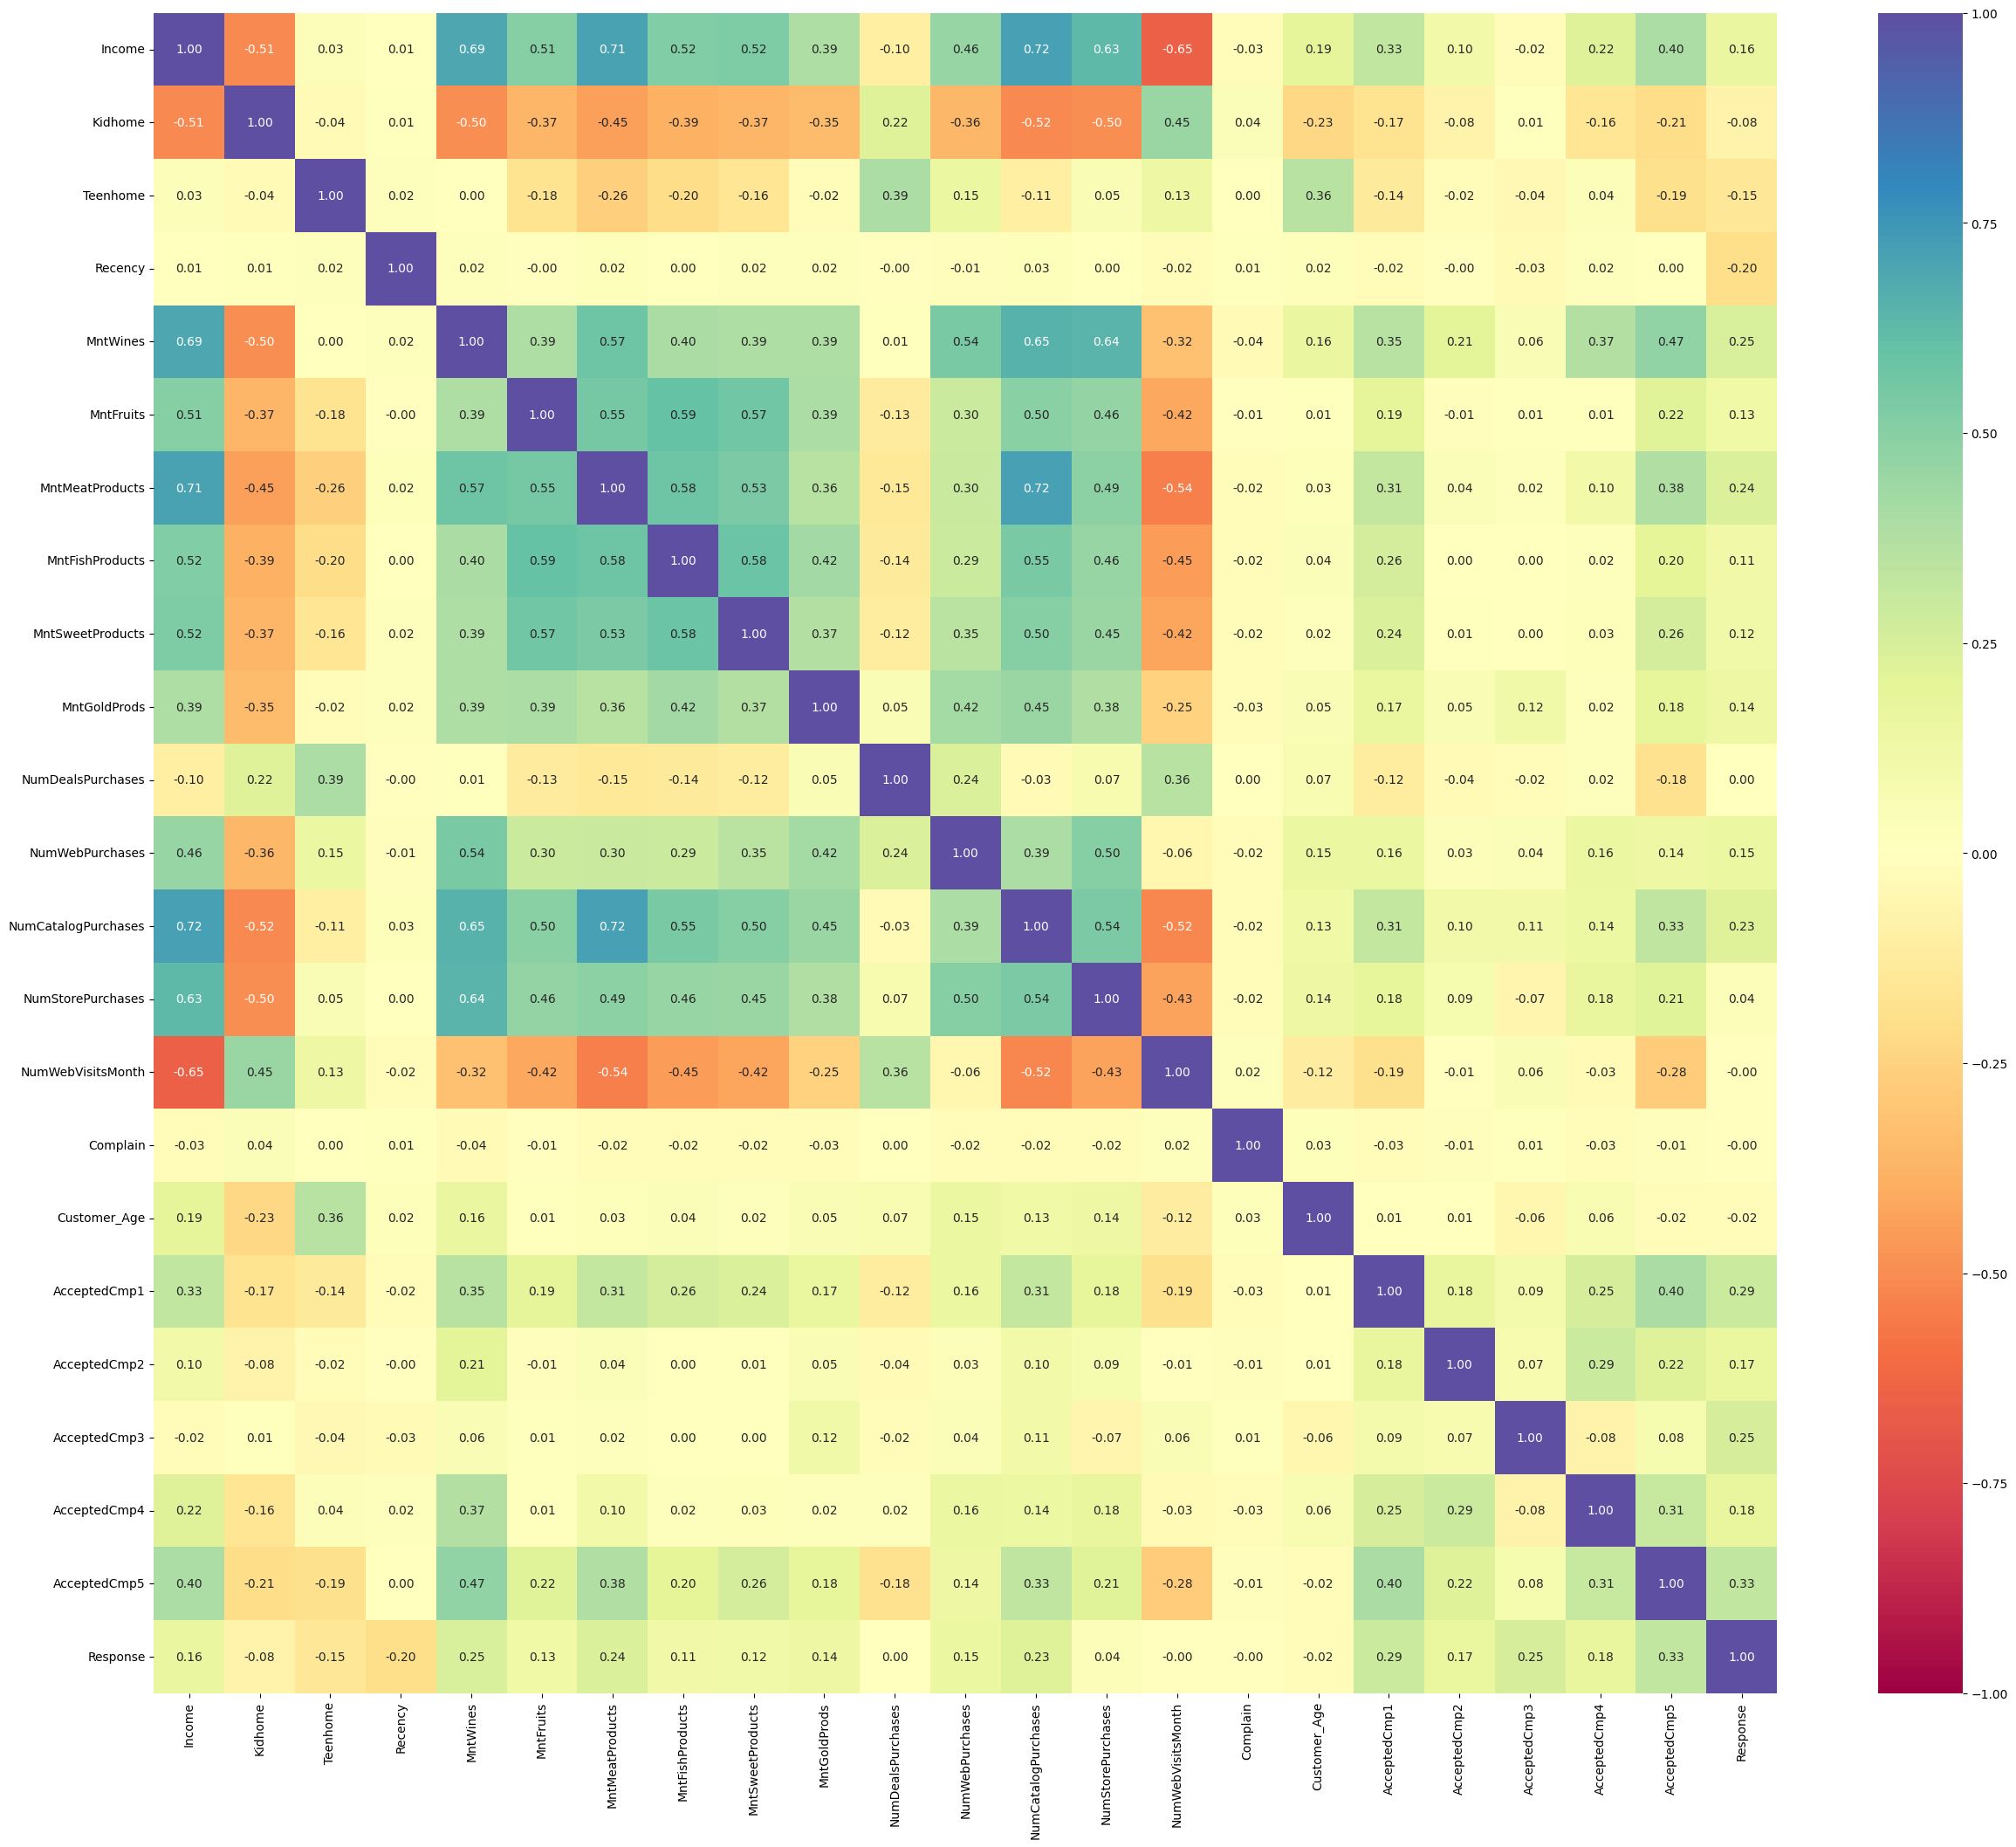

In [70]:
# Adding my numeric variables to a list
num_vars = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# Plotting the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df[num_vars].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

**Observations:**
1. Income is positively correlated with all product categories, all purchase categories except for deals, and all campaigns except for campaign 3. Income has a negative correlation with having young kids and visits to the web site.
2. Kidhome is negatively correlated with all purchase and product categories except deals. It shows high positive correlation with deals and web site visits - nearly the exact opposite of income.
3. Intuitively, the only correlation of note from Teenhome is Customer Age.
4. Recency doesn't show a noticeable correlation to any other variable.
5. MntWines has strong positive correlations with Income, Catalog Purchases, and Store Purchases. Like income, it has negative correlations with Kidhome and web site visits.
6. MntMeat has strong positive correlation with Income and Catalog Purchases. It has strong negative correlations with web site visits and Kidhome and Teenhome.
7. NumDealsPurchases is positively correlated with children at home and web site visits and purchases.
8. NumWebVisitsMonth is negatively correlated with nearly everything except children at home and deal purchases.
9. Campaign 1 and 5 were very similar in that they had positive correlations with all product types, were most strongly positively correlated with catalog sales, and had negative correlations with deals and web visits. I may group these together as an 'everyday low price print campaign' or 'EDLP_Print'.
10. Campaign 2 and 4 were very similar in that they had their strongest postive correlation with in-store wine sales, but nothing else beyond that. I may group these together as an 'in store wine flyer' or 'In_Store_Wine'.
11. Campaign 3 had a slight positive correlation to gold products, performed best in catalog sales, and was the only campaign that did not have a negative correlation with web visits.


### **Biavariate Plots**

#### **Income v. NumCatalog Purchases**

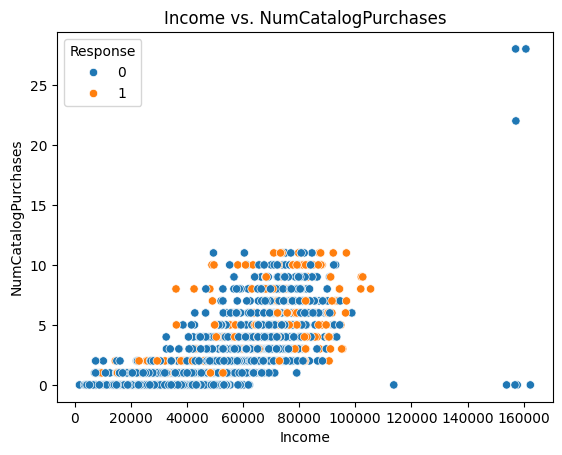

In [71]:
# Visualizing the relationship between Income and NumCatalogPurchases
sns.scatterplot(x='Income', y='NumCatalogPurchases', hue='Response', data=df)
plt.title('Income vs. NumCatalogPurchases')
plt.show()

* We can see the positive linear relationship here and also the fact that responses to the latest campaign are densest from around 70-110,000.

#### **Income v. MntMeatProducts**

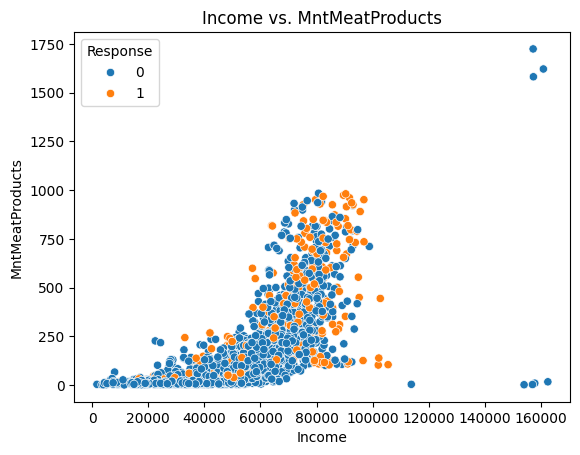

In [72]:
# Visualizing the relationship between Income and MntMeatProducts
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Response', data=df)
plt.title('Income vs. MntMeatProducts')
plt.show()

* Positive correlation with response density heaviest in the 70-110,000 range.

#### **Income v. MntWines**

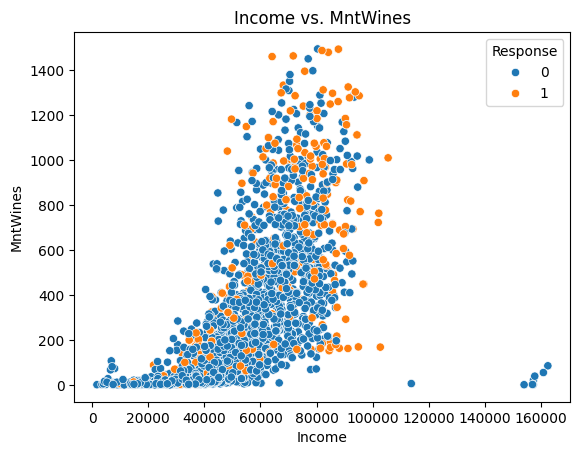

In [73]:
# Visualizing the relationship between Income and MntWines
sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df)
plt.title('Income vs. MntWines')
plt.show()

* Wine sales really take off after about 40,000 in income. Response is densest from around 70-110,000 and upwards of 800 in wine sales.

#### **Income v. Kidhome**

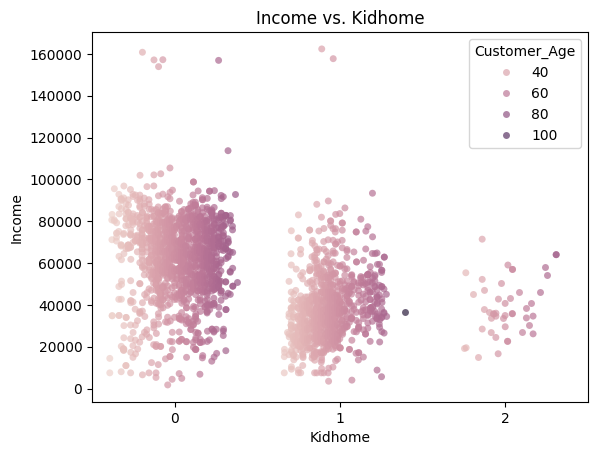

In [74]:
# Visualizing the relationship between Income and Kidhome
sns.stripplot(data=df, x='Kidhome', y='Income', hue='Customer_Age', jitter=True, dodge=True, alpha=0.7)
plt.title('Income vs. Kidhome')
plt.show()

* We can see income seems to be lower as the number of kids goes up. This could be a function of age as we see fewer older folks as the number of kids goes up as well.

#### **Income v. Customer_Age**

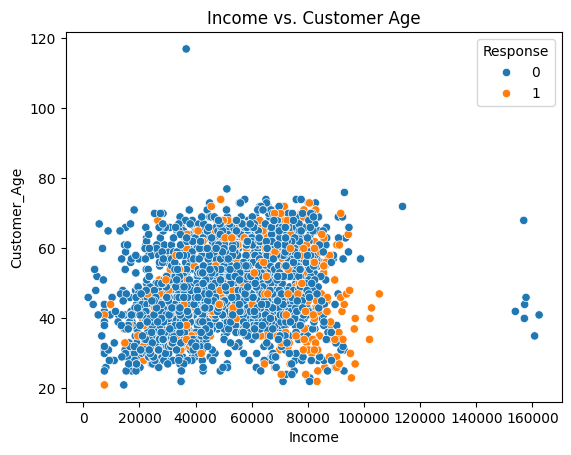

In [75]:
# Visualizing the relationship between Income and Customer Age
sns.scatterplot(data=df, y='Customer_Age', x='Income', hue='Response')
plt.title('Income vs. Customer Age')
plt.show()

* Very surprising, I expected to see a more dramatic relationship between Income and Age, but there is very little correlation.

#### **Kidhome v. NumDealsPurchases**

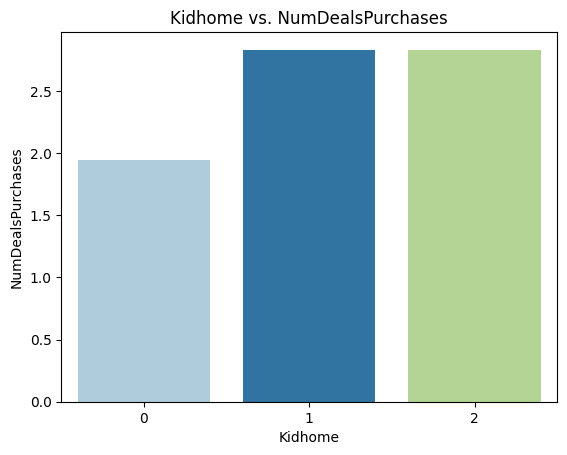

In [76]:
# Visualizing the relationship between Kidhome and NumDealsPurchases
sns.barplot(data=df, x='Kidhome', y='NumDealsPurchases', palette='Paired', ci=None)
plt.title('Kidhome vs. NumDealsPurchases')
plt.show()

* People with kids at home, on average, buy more products on promotion than those without kids.

#### **Kidhome v. NumWebVisitsMonth**

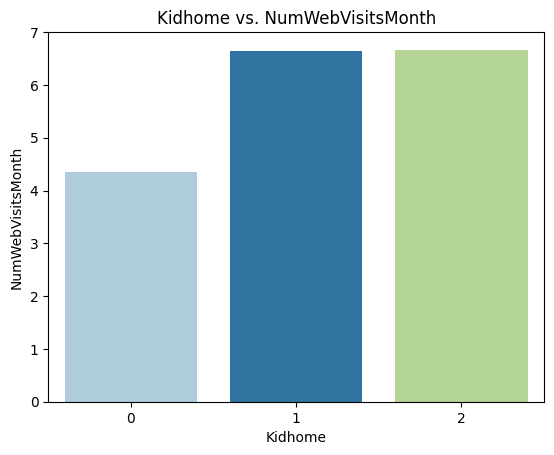

In [77]:
# Visualizing the relationship between Kidhome and NumWebVisitsMonth
sns.barplot(data=df, x='Kidhome', y='NumWebVisitsMonth', palette='Paired', ci=None)
plt.title('Kidhome vs. NumWebVisitsMonth')
plt.show()

* Customers with kids at home average ~6.5 website visits in the past month, while those with out average around 4.5.

#### **NumWebVisitsMonth v. NumWebPurchases**

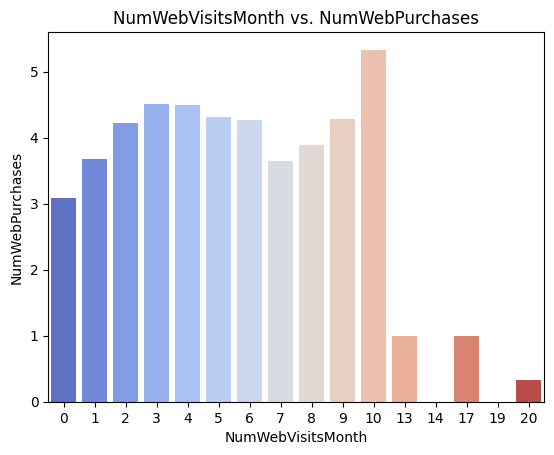

In [78]:
# Visualizing the relationship between NumWebVisitMonth v. NumWebPurchases
sns.barplot(data=df, x='NumWebVisitsMonth', y='NumWebPurchases', palette='coolwarm', ci=None)
plt.title('NumWebVisitsMonth vs. NumWebPurchases')
plt.show()


* Website purchases are greatest among customers with ~10 website visits in the last 30 days.
* Also of note that 3-4 visits is also performs well.
* Very sharp decline in website purchases in customers that visit the website more than 10 times.

### **Correlation of Categorical Variables**

In [133]:
# Revisiting our statistics for our categorical variables
df.describe(include='object')

,Education,Marital_Status,WineGroup,ChildGroup,VisitGroup
count,2239,2239,2239,2239,2239
unique,5,8,2,2,2
top,Graduation,Married,Below_Avg,With_Children,Low
freq,1126,863,1376,1601,2230


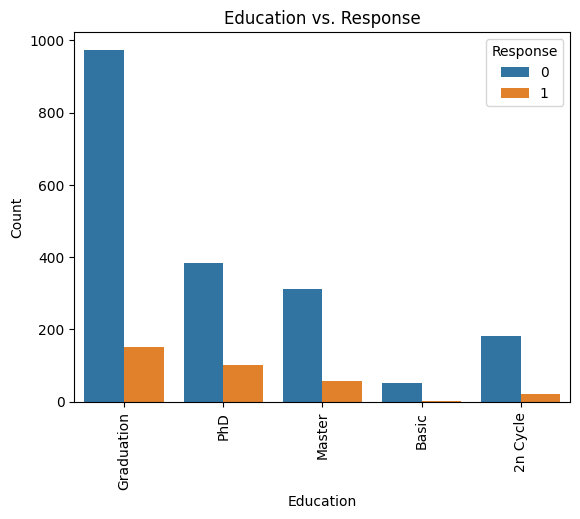

In [137]:
# Plotting the relationship between Education and Response
sns.countplot(data=df, x='Education', hue='Response')
plt.title('Education vs. Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* We see very low Response rates from Basic and 2n Cycle education levels.
* Graduation has the most responses, but very high ratios in PhD and Masters.

In [136]:
# Finding the correlation between Education and Response
groups = [group['Response'].values for name, group in df.groupby('Education')]
f_stat, p_val = stats.f_oneway(*groups)
print('F-statistic:', f_stat)
print('p-value:', p_val)

F-statistic: 5.805821855317431
p-value: 0.00012017010229581296


* The p-value suggests there is a strong correlation between Education and Response.

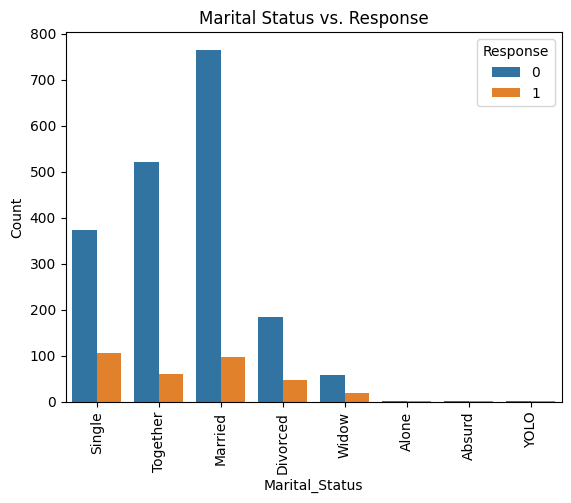

In [138]:
# Plotting the relationship between Marital Status and Response
sns.countplot(data=df, x='Marital_Status', hue='Response')
plt.title('Marital Status vs. Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [141]:
# Finding the correlation between Marital Status and Response
groups = [group['Response'].values for name, group in df.groupby('Marital_Status')]
f_stat, p_val = stats.f_oneway(*groups)
print('F-statistic:', f_stat)
print('p-value:', p_val)

F-statistic: 10.989654647262762
p-value: 1.8017106829728704e-10


* It's doubtful that Marital Status is very highly correlated with Response.

#### **Campaign Attributes**

* We're going to create 5 different datasets to understand the statistical differences between each of them to help identify where they excelled and where there is room for improvement.

In [79]:
# Creating the different dataframes by campaign
df1 = df[df['AcceptedCmp1'] == 1]
df2 = df[df['AcceptedCmp2'] == 1]
df3 = df[df['AcceptedCmp3'] == 1]
df4 = df[df['AcceptedCmp4'] == 1]
df5 = df[df['AcceptedCmp5'] == 1]

# Creating a list of the different dataframes
campaigns = [df1, df2, df3, df4, df5]

# Create list of campaign names for labeling
campaign_names = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']

# Initialize empty list to store summary DataFrames
summary_list = []

# Loop through each campaign dataframe and name
for name, data in zip(campaign_names, campaigns):
    # Compute count, min, max, and mean for numeric columns
    summary = data.describe().loc[['count','mean']]
    # Add a column to identify which campaign this summary belongs to
    summary['Campaign'] = name
    # Move the campaign column to the front
    summary = summary.reset_index().rename(columns={'index': 'Statistic'})
    summary_list.append(summary)

# Combine all summaries into one DataFrame
combined_summary = pd.concat(summary_list, ignore_index=True)

# Moving Campaign name to the front of the dataframe
cols = combined_summary.columns.tolist()
cols = cols[-1:] + cols[:-1]
combined_summary = combined_summary[cols]

# Rerodering the data for easy readability
combined_summary = combined_summary.sort_values(by=['Statistic', 'Campaign']).reset_index(drop=True)

# Display final result
combined_summary



,Campaign,Statistic,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Cmp1,count,142.000000,144.000000,144.000000,144,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
1,Cmp2,count,30.000000,30.000000,30.000000,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
2,Cmp3,count,163.000000,163.000000,163.000000,163,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
3,Cmp4,count,164.000000,167.000000,167.000000,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
4,Cmp5,count,162.000000,163.000000,163.000000,163,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
5,Cmp1,mean,78872.626761,0.090278,0.215278,2013-08-09 22:10:00,46.979167,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1.416667,5.729167,6.097222,8.062500,3.534722,0.000000,48.465278,1.000000,0.090278,0.166667,0.326389,0.472222,0.548611
6,Cmp2,mean,71054.833333,0.066667,0.433333,2013-06-29 21:36:00,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1.700000,4.900000,5.166667,8.166667,5.166667,0.000000,48.866667,0.433333,1.000000,0.233333,0.733333,0.566667,0.666667
7,Cmp3,mean,50802.582822,0.472393,0.423313,2013-07-15 23:33:29.815950848,45.699387,378.656442,28.392638,181.668712,37.595092,27.288344,66.938650,2.165644,4.503067,3.754601,5.006135,5.846626,0.012270,45.552147,0.147239,0.042945,1.000000,0.000000,0.147239,0.472393
8,Cmp4,mean,68663.231707,0.137725,0.580838,2013-06-27 07:11:08.263473152,51.029940,746.520958,27.724551,248.772455,40.766467,31.227545,48.113772,2.431138,5.610778,4.095808,7.844311,5.041916,0.000000,50.748503,0.281437,0.131737,0.000000,1.000000,0.353293,0.371257
9,Cmp5,mean,82352.827160,0.049080,0.134969,2013-07-14 16:29:26.871165696,49.122699,871.668712,56.938650,468.036810,76.435583,65.306748,77.723926,1.061350,5.460123,6.024540,8.282209,2.907975,0.006135,47.337423,0.417178,0.104294,0.147239,0.361963,1.000000,0.564417


* Fantastic! Now we can use a combination of campaign performance and category performance to find optimal values for well rounded campaign.

#### **Customer Tendencies for Offer Acceptance**

In [80]:
# Dropping the first 6 rows of the combined_summery dataframe and resetting the index
combined_summary.drop(combined_summary.index[:5], inplace=True)
combined_summary.reset_index(drop=True, inplace=True)
combined_summary

,Campaign,Statistic,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Cmp1,mean,78872.626761,0.090278,0.215278,2013-08-09 22:10:00,46.979167,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1.416667,5.729167,6.097222,8.062500,3.534722,0.000000,48.465278,1.000000,0.090278,0.166667,0.326389,0.472222,0.548611
1,Cmp2,mean,71054.833333,0.066667,0.433333,2013-06-29 21:36:00,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1.700000,4.900000,5.166667,8.166667,5.166667,0.000000,48.866667,0.433333,1.000000,0.233333,0.733333,0.566667,0.666667
2,Cmp3,mean,50802.582822,0.472393,0.423313,2013-07-15 23:33:29.815950848,45.699387,378.656442,28.392638,181.668712,37.595092,27.288344,66.938650,2.165644,4.503067,3.754601,5.006135,5.846626,0.012270,45.552147,0.147239,0.042945,1.000000,0.000000,0.147239,0.472393
3,Cmp4,mean,68663.231707,0.137725,0.580838,2013-06-27 07:11:08.263473152,51.029940,746.520958,27.724551,248.772455,40.766467,31.227545,48.113772,2.431138,5.610778,4.095808,7.844311,5.041916,0.000000,50.748503,0.281437,0.131737,0.000000,1.000000,0.353293,0.371257
4,Cmp5,mean,82352.827160,0.049080,0.134969,2013-07-14 16:29:26.871165696,49.122699,871.668712,56.938650,468.036810,76.435583,65.306748,77.723926,1.061350,5.460123,6.024540,8.282209,2.907975,0.006135,47.337423,0.417178,0.104294,0.147239,0.361963,1.000000,0.564417


In [81]:
# Adding a column for 'Campaign Performance'
combined_summary['Campaign Performance'] = [0.142, 0.30, 0.163, 0.167, 0.163]
combined_summary

,Campaign,Statistic,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Campaign Performance
0,Cmp1,mean,78872.626761,0.090278,0.215278,2013-08-09 22:10:00,46.979167,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1.416667,5.729167,6.097222,8.062500,3.534722,0.000000,48.465278,1.000000,0.090278,0.166667,0.326389,0.472222,0.548611,0.142
1,Cmp2,mean,71054.833333,0.066667,0.433333,2013-06-29 21:36:00,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1.700000,4.900000,5.166667,8.166667,5.166667,0.000000,48.866667,0.433333,1.000000,0.233333,0.733333,0.566667,0.666667,0.300
2,Cmp3,mean,50802.582822,0.472393,0.423313,2013-07-15 23:33:29.815950848,45.699387,378.656442,28.392638,181.668712,37.595092,27.288344,66.938650,2.165644,4.503067,3.754601,5.006135,5.846626,0.012270,45.552147,0.147239,0.042945,1.000000,0.000000,0.147239,0.472393,0.163
3,Cmp4,mean,68663.231707,0.137725,0.580838,2013-06-27 07:11:08.263473152,51.029940,746.520958,27.724551,248.772455,40.766467,31.227545,48.113772,2.431138,5.610778,4.095808,7.844311,5.041916,0.000000,50.748503,0.281437,0.131737,0.000000,1.000000,0.353293,0.371257,0.167
4,Cmp5,mean,82352.827160,0.049080,0.134969,2013-07-14 16:29:26.871165696,49.122699,871.668712,56.938650,468.036810,76.435583,65.306748,77.723926,1.061350,5.460123,6.024540,8.282209,2.907975,0.006135,47.337423,0.417178,0.104294,0.147239,0.361963,1.000000,0.564417,0.163


In [82]:
# Dropping unnecessary columns
combined_summary.drop(['Statistic', 'Dt_Customer', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)
combined_summary

,Campaign,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Campaign Performance
0,Cmp1,78872.626761,0.090278,0.215278,46.979167,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1.416667,5.729167,6.097222,8.062500,3.534722,48.465278,0.142
1,Cmp2,71054.833333,0.066667,0.433333,48.666667,898.666667,22.966667,250.300000,38.733333,30.600000,66.400000,1.700000,4.900000,5.166667,8.166667,5.166667,48.866667,0.300
2,Cmp3,50802.582822,0.472393,0.423313,45.699387,378.656442,28.392638,181.668712,37.595092,27.288344,66.938650,2.165644,4.503067,3.754601,5.006135,5.846626,45.552147,0.163
3,Cmp4,68663.231707,0.137725,0.580838,51.029940,746.520958,27.724551,248.772455,40.766467,31.227545,48.113772,2.431138,5.610778,4.095808,7.844311,5.041916,50.748503,0.167
4,Cmp5,82352.827160,0.049080,0.134969,49.122699,871.668712,56.938650,468.036810,76.435583,65.306748,77.723926,1.061350,5.460123,6.024540,8.282209,2.907975,47.337423,0.163


In [83]:
# Creating a list of variables to calculate weighted averages for
weighted_vars = [col for col in combined_summary.columns if col not in ['Campaign', 'Campaign Performance']]

# Calculating the weighted averages for each variable
weighted_avgs = (combined_summary[weighted_vars].multiply(combined_summary['Campaign Performance'], axis=0)).sum() / combined_summary['Campaign Performance'].sum()
weighted_avgs

,0
Income,70253.962056
Kidhome,0.150609
Teenhome,0.372802
Recency,48.394697
MntWines,754.859670
MntFruits,35.678402
MntMeatProducts,303.864944
MntFishProducts,53.539335
MntSweetProducts,41.430719
MntGoldProds,66.831803


* Here we can see the weighted average of the attributes of a customer that tends to accept an offer

#### **Optimization**

In [84]:
# Finding optimal values for each variable

# Creating an empty list to store the results in
results = []

# Looping through the variables in the dataframe
for var in weighted_vars:
  # Finding the correlation between the variable and campaign performance
  corr = combined_summary[var].corr(combined_summary['Campaign Performance'])
  # Skipping if corr is not a number
  if np.isnan(corr):
    continue
  # If correlation is positive, find the maximum value within the column
  if corr > 0:
    optimal_row = combined_summary.loc[combined_summary[var].idxmax()]
  # If correlation is negative, find the lowest value within the column
  else:
    optimal_row = combined_summary.loc[combined_summary[var].idxmin()]

  # Append the values to the results list in the form of a dictionary
  results.append({'Variable': var,
                  'Correlation_w_Performance': round(corr, 3),
                  'Optimal_Campaign': optimal_row['Campaign'],
                  'Optimal_Value': round(optimal_row[var], 3),
                  'Campaign_Perf_at_Optimal': round(optimal_row['Campaign Performance'], 3)})
# Convert the dictionary to a dataframe
optimal_values_df = pd.DataFrame(results)
optimal_values_df


,Variable,Correlation_w_Performance,Optimal_Campaign,Optimal_Value,Campaign_Perf_at_Optimal
0,Income,-0.028,Cmp3,50802.583,0.163
1,Kidhome,-0.262,Cmp5,0.049,0.163
2,Teenhome,0.310,Cmp4,0.581,0.167
3,Recency,0.170,Cmp4,51.030,0.167
4,MntWines,0.423,Cmp2,898.667,0.300
5,MntFruits,-0.594,Cmp2,22.967,0.300
6,MntMeatProducts,-0.365,Cmp3,181.669,0.163
7,MntFishProducts,-0.511,Cmp3,37.595,0.163
8,MntSweetProducts,-0.465,Cmp3,27.288,0.163
9,MntGoldProds,-0.131,Cmp4,48.114,0.167


In [85]:
# Creating a dataframe that combines the Optimal_Value column from optimal_values_df and the weighted_avgs
attribute_comp_df = optimal_values_df[['Variable','Correlation_w_Performance','Optimal_Value']]
attribute_comp_df['Average_Weighted_Values'] = attribute_comp_df['Variable'].map(weighted_avgs)
attribute_comp_df


,Variable,Correlation_w_Performance,Optimal_Value,Average_Weighted_Values
0,Income,-0.028,50802.583,70253.962056
1,Kidhome,-0.262,0.049,0.150609
2,Teenhome,0.310,0.581,0.372802
3,Recency,0.170,51.030,48.394697
4,MntWines,0.423,898.667,754.859670
5,MntFruits,-0.594,22.967,35.678402
6,MntMeatProducts,-0.365,181.669,303.864944
7,MntFishProducts,-0.511,37.595,53.539335
8,MntSweetProducts,-0.465,27.288,41.430719
9,MntGoldProds,-0.131,48.114,66.831803


## **Feature Engineering**

### **Campaign Condensing**

* We identified campaigns with very similar attributes that I'd like to group together. Specifically, campaign 1 and 5 as "EDLP_Print" and campaigns 2 and 4 as 'In_Store_Wine'.

In [86]:
# Combining AcceptedCmp1 and AcceptedCmp5 into a single variable "EDLP_Print"
df['EDLP_Print'] = df['AcceptedCmp1'] + df['AcceptedCmp5']

# Combining AcceptedCmp2 and AcceptedCmp4 into a single variable "In_Store_Wine"
df['In_Store_Wine'] = df['AcceptedCmp2'] + df['AcceptedCmp4']

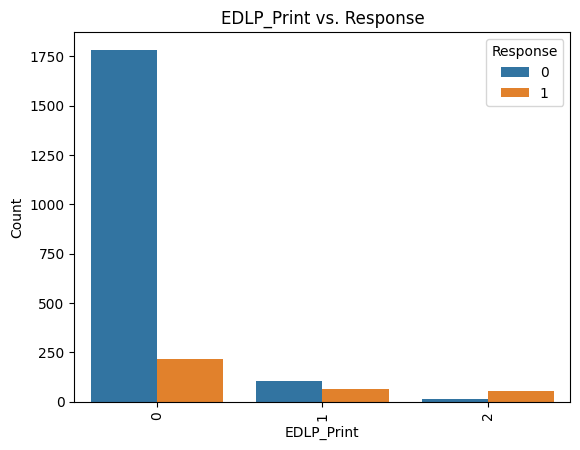

In [142]:
# Visualizing the relationship between EDLP_Print and Response
sns.countplot(data=df, x='EDLP_Print', hue='Response')
plt.title('EDLP_Print vs. Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

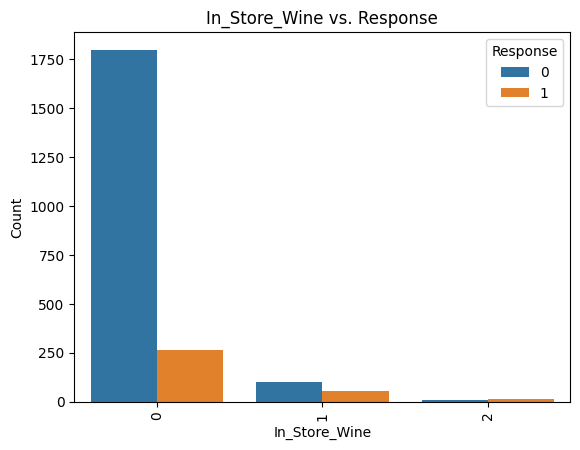

In [143]:
# Visualizing the relationship between In_Store_Wine and Response
sns.countplot(data=df, x='In_Store_Wine', hue='Response')
plt.title('In_Store_Wine vs. Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **Total_Mkt_Acceptance**

* We're going to create a column that calculates all accepted offers from all campaigns by customer.

In [87]:
# Creating a list of campaigns
campaigns = ['EDLP_Print', 'In_Store_Wine', 'AcceptedCmp3']
# Creating a columns with the sum of all campaigns
df['Total_Mkt_Acceptance'] = df[campaigns].sum(axis=1)

In [88]:
df['Total_Mkt_Acceptance'].value_counts()

,count
Total_Mkt_Acceptance,
0,1776
1,325
2,83
3,44
4,11


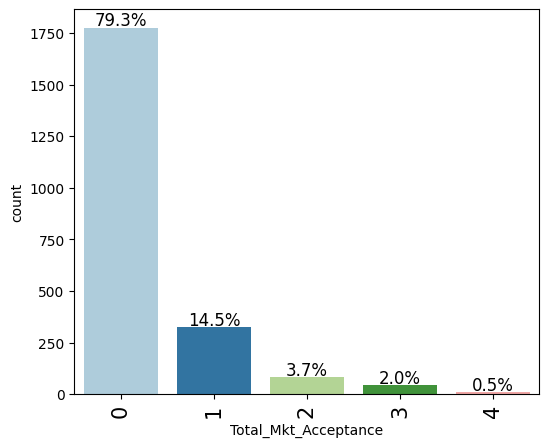

In [89]:
# Visualizing the distribution of Total_Mkt_Acceptance
labeled_barplot(df, 'Total_Mkt_Acceptance', perc=True)

### **Income Binning**

* I'd like to bin up our income brackets, and also create a category for undeclared to see if there is any behavioral differences among the groups.

In [90]:
# Binning the Income variable
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, np.inf]
labels = ['Poverty', 'Low', 'Mid', 'Upper Middle', 'High', 'Upper High', 'Rich']
df['Income_Bin'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
df['Income_Bin'] = df.Income_Bin.cat.add_categories('Undeclared').fillna('Undeclared')
df['Income_Bin'].value_counts()

,count
Income_Bin,
Mid,642
Upper Middle,626
Low,605
High,204
Poverty,126
Undeclared,24
Rich,7
Upper High,5


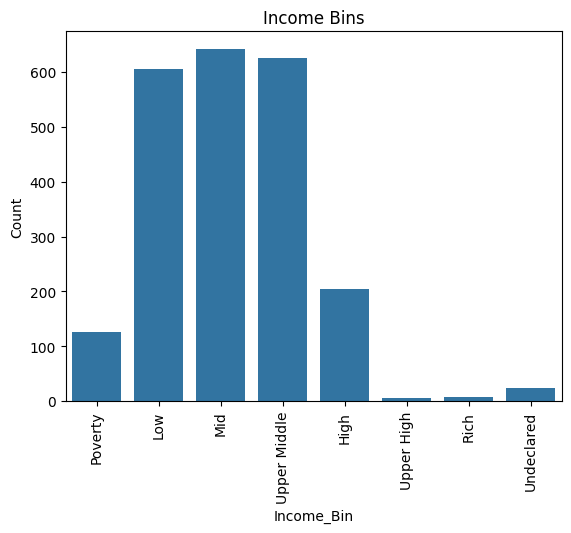

In [91]:
# Visualizing the Income_Bin variable
sns.countplot(data=df, x='Income_Bin')
plt.title('Income Bins')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* Now let's visualize this relationship to Response

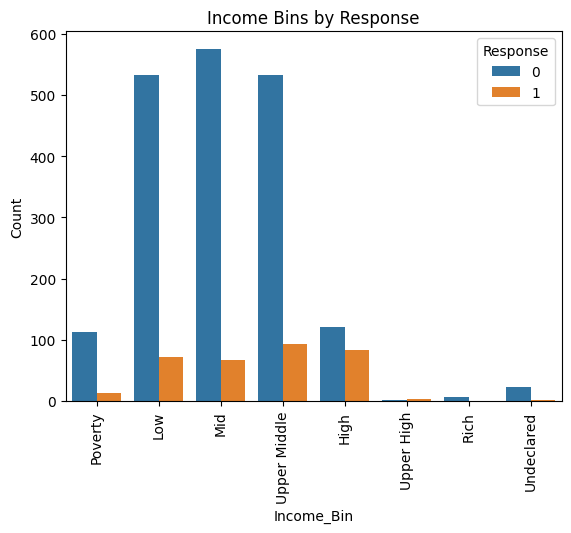

In [92]:
# Visualizing the relationship between Income_Bin and Response
sns.countplot(data=df, x='Income_Bin', hue='Response')
plt.title('Income Bins by Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* We can see that the highest ratio of Response come from the High income class, and the most come from Upper Middle, but we can't afford to leave out Low and Mid. This tells me that by focusing on those two groups we can drive efficiencies in our campaign strategies. We're leaving quite a few on the table, but we may be able to distinguish what attributes of Low and Mid could include them in future strategies.

### **Total_Children**

* Due to the stange visualizations between Kidshome and Teenshome, we'll create a variable of Total_Children and see how that correlates with other categories.

In [93]:
# Creating the Total_Children feature for our dataset
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

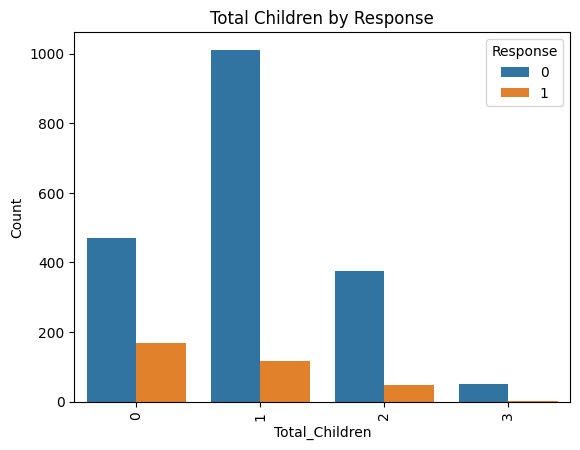

In [94]:
# Visualizing the 'Total_Children' wrt the 'Response' variable
sns.countplot(data=df, x='Total_Children', hue='Response')
plt.title('Total Children by Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **Total_Spend**

* We'll create a category of Total_Spend to see how that may correlate to other variables as well.

In [95]:
# Creating the Total_Spend columns that adds the number of items purchased from each of the 6 categories
df['Total_Spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

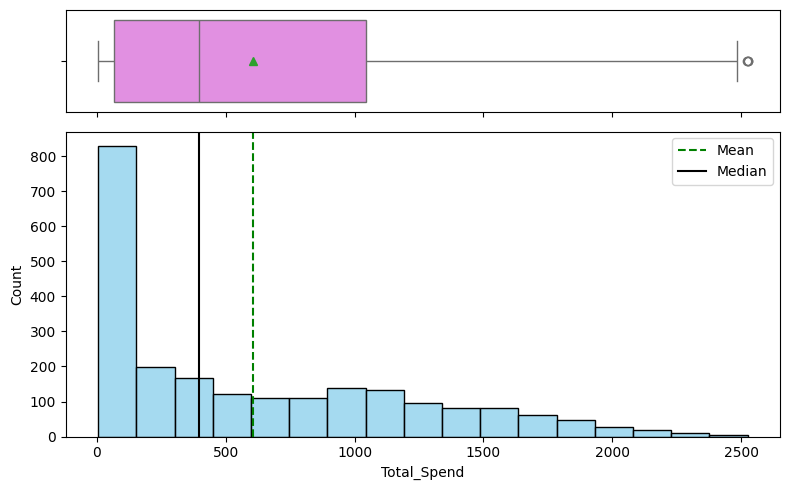

In [96]:
# Visualizing the distribution of Total_Spend
histogram_boxplot(df, 'Total_Spend')

#### **NumWebVisitsMonth v. Total_Spend**

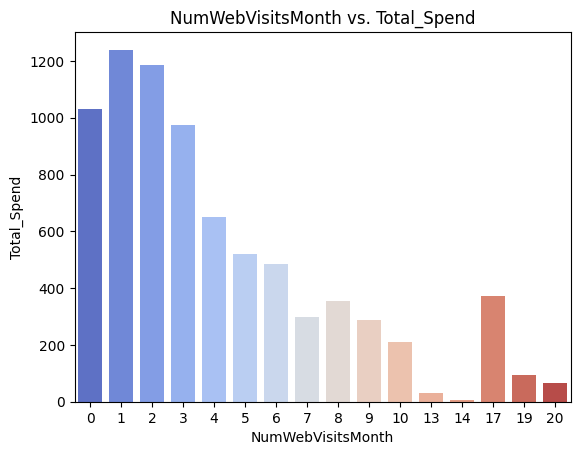

In [97]:
# Visualizing the relationship between NumWebVisitsMonth and Total Spend
sns.barplot(data=df, x='NumWebVisitsMonth', y='Total_Spend', palette='coolwarm', ci=None)
plt.title('NumWebVisitsMonth vs. Total_Spend')
plt.show()

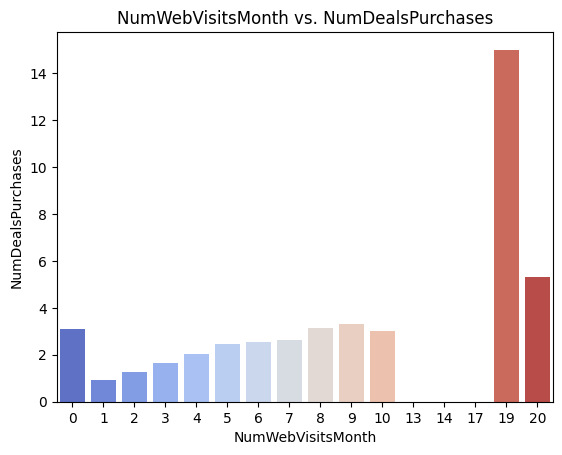

In [98]:
# Visualizing the relationship between NumWebVisitsMonth and NumDealsPurchases
sns.barplot(data=df, x='NumWebVisitsMonth', y='NumDealsPurchases', palette='coolwarm', ci=None)
plt.title('NumWebVisitsMonth vs. NumDealsPurchases')
plt.show()

### **HPPCP: High-Perfoming Product Catalog Purchases**

* We've seen that Wine, Meat and Catalog purchases are most highly correlated with Response Rate. Knowing that, let's create a variable in which we calculate an estimate of how many high-performing product purchases each customer has made to see how it correlates with Response and other variables.

* First, we'll need to check that there are no instances in the dataset where Total spend is less than the sum of all the channel purchases.

In [99]:
# Isolating the rows in the dataframe where Total_Spend is less than the sum of Catalog, Store, and Web Purchases
df[df['Total_Spend'] < (df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,EDLP_Print,In_Store_Wine,Total_Mkt_Acceptance,Income_Bin,Total_Children,Total_Spend


* Good! That's empty. So let's continue creating a column for each channel that calculates the % spend in each channel.

In [100]:
# Calculating percentage of NumCatalogPurchases, NumStorePurchases, and NumWebPurchase to Total_Spend
df['Catalog_Pct'] = df['NumCatalogPurchases'] / df['Total_Spend']
df['Store_Pct'] = df['NumStorePurchases'] / df['Total_Spend']
df['Web_Pct'] = df['NumWebPurchases'] / df['Total_Spend']

In [101]:
# Creating the HPPCP variable by summing the Wine and Meat purchases and multiplying by the Catalog_Pct
df['HPPCP'] = (df['MntWines'] + df['MntMeatProducts']) * df['Catalog_Pct']

In [102]:
df['HPPCP'].describe()

,HPPCP
count,2239.000000
mean,2.025042
std,2.355010
min,0.000000
25%,0.000000
50%,1.029024
75%,3.289703
max,27.935260


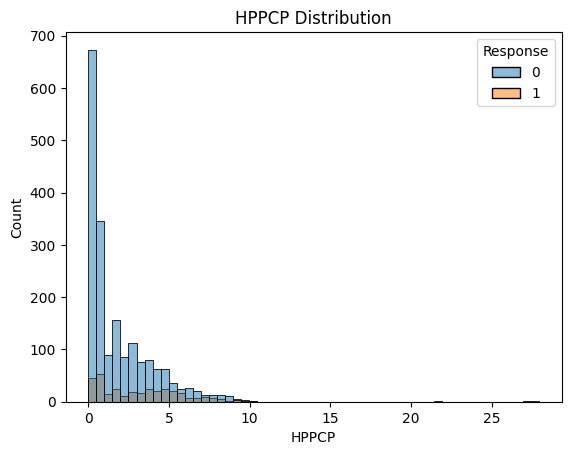

In [103]:
# Visualzing the HPPCP variable distribution
sns.histplot(df, x='HPPCP', hue='Response')
plt.title('HPPCP Distribution')
plt.show()

### **Marital Status Cleanup**

In [139]:
# Combining Absurd, YOLO, and Alone into a category called Other
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO', 'Alone'], 'Other')

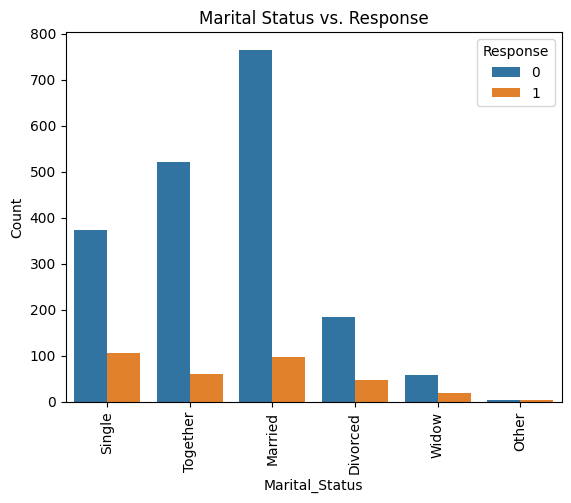

In [140]:
# Visualizing the relationship between Marital Status and Response
sns.countplot(data=df, x='Marital_Status', hue='Response')
plt.title('Marital Status vs. Response')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## **Revisiting our Heatmap**

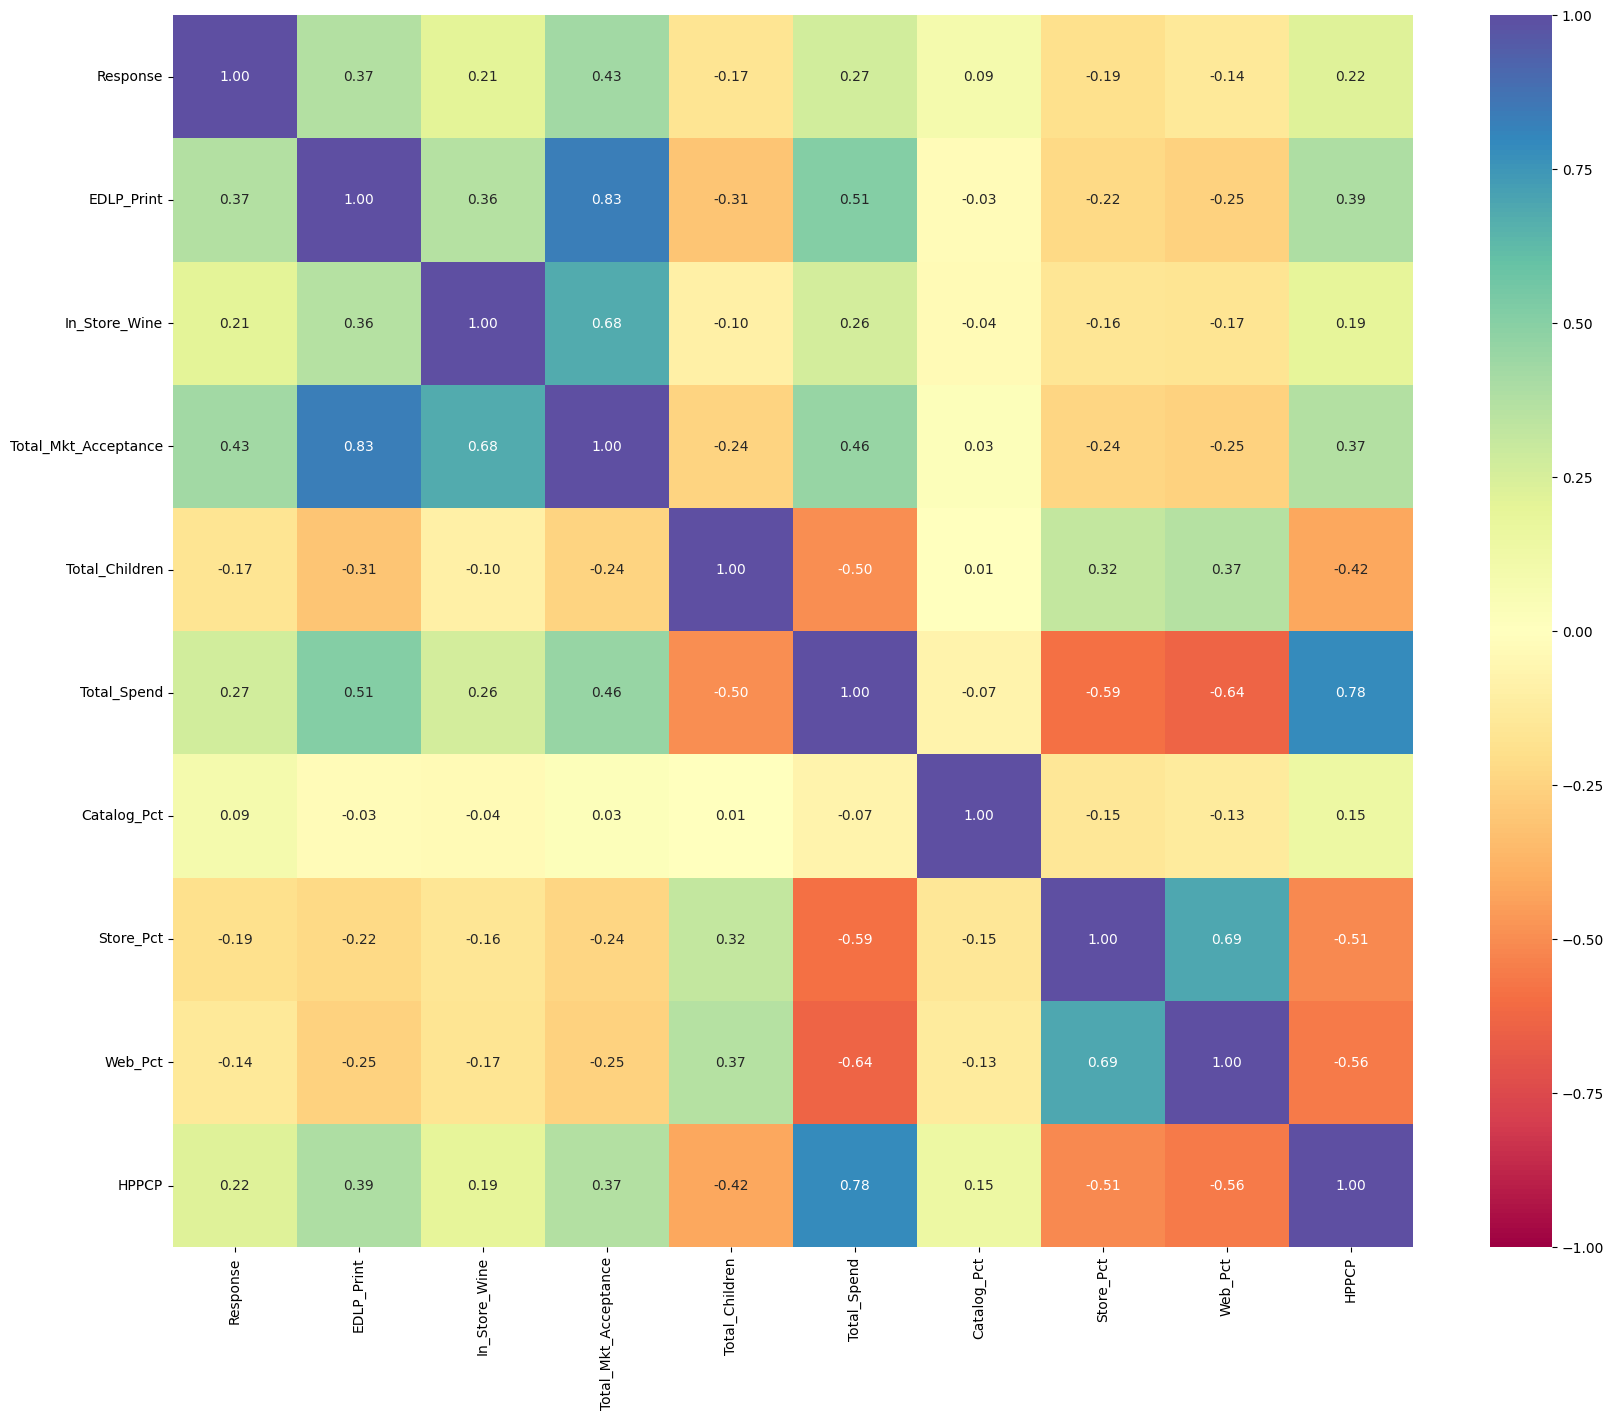

In [104]:
# Adding my numeric variables to a list
heatmap_vars = df.iloc[:, 25:].select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# Plotting the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df[heatmap_vars].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

* Taking a look at the variables most correlated with "Response" now.

In [105]:
df.select_dtypes(include=['number']).corr()['Response'].sort_values(ascending=False)

,Response
Response,1.000000
Total_Mkt_Acceptance,0.425988
EDLP_Print,0.370939
AcceptedCmp5,0.326600
AcceptedCmp1,0.293949
Total_Spend,0.265865
AcceptedCmp3,0.254220
MntWines,0.247141
MntMeatProducts,0.240206
NumCatalogPurchases,0.226271


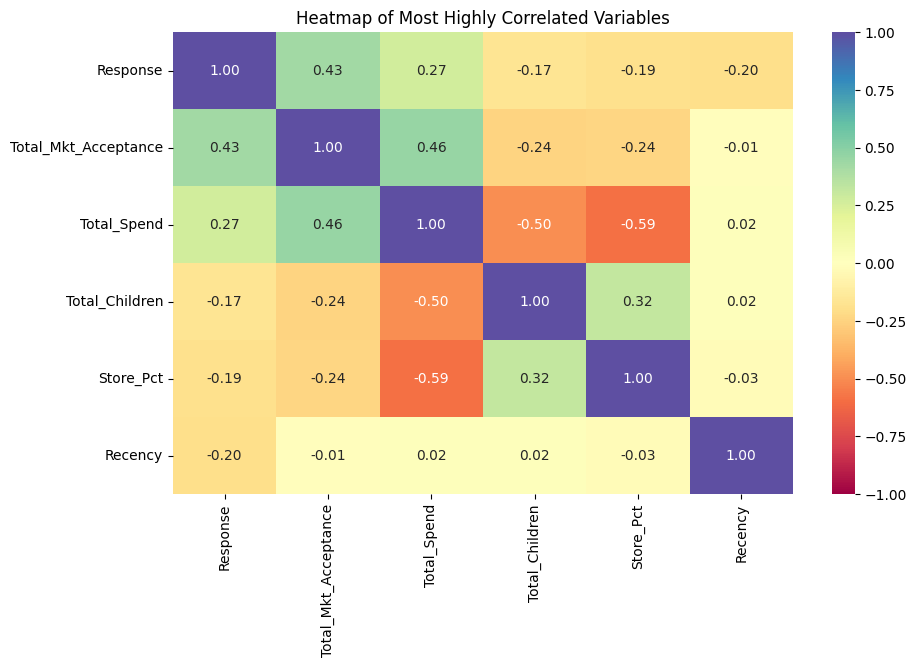

In [106]:
# Creating a heatmap of just our most highly correlated variables
high_corr_variables = ['Response','Total_Mkt_Acceptance', 'Total_Spend', 'Total_Children', 'Store_Pct','Recency']

# Plotting the heatmap of our most highly correlated variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[high_corr_variables].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.title('Heatmap of Most Highly Correlated Variables')
plt.show()

## **Data Preprocessing**

In [108]:
# Making a copy of the dataframe
df2 = df.copy()

In [109]:
df2.drop(['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome','Teenhome','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1, inplace=True)

In [110]:
df2.drop(['NumDealsPurchases','NumCatalogPurchases','NumWebVisitsMonth','Customer_Age','Income'], axis=1, inplace=True)

In [131]:
df2.drop(['NumWebPurchases','NumStorePurchases'], axis=1, inplace=True)

In [132]:
df2.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Education,2239,5,Graduation,1126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2239,8,Married,863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dt_Customer,2239,NaN,NaN,NaN,2013-07-10 12:00:57.882983424,2012-07-30 00:00:00,2013-01-16 12:00:00,2013-07-09 00:00:00,2013-12-30 12:00:00,2014-06-29 00:00:00,NaN
Recency,2239.0,NaN,NaN,NaN,49.11255,0.0,24.0,49.0,74.0,99.0,28.968533
MntWines,2239.0,NaN,NaN,NaN,304.071014,0.0,24.0,174.0,504.5,1493.0,336.611654
MntMeatProducts,2239.0,NaN,NaN,NaN,166.254131,0.0,16.0,67.0,231.5,1725.0,223.349562
AcceptedCmp3,2239.0,NaN,NaN,NaN,0.0728,0.0,0.0,0.0,0.0,1.0,0.259867
Response,2239.0,NaN,NaN,NaN,0.149174,0.0,0.0,0.0,0.0,1.0,0.356339
EDLP_Print,2239.0,NaN,NaN,NaN,0.137115,0.0,0.0,0.0,0.0,2.0,0.423244
In_Store_Wine,2239.0,NaN,NaN,NaN,0.087986,0.0,0.0,0.0,0.0,2.0,0.316134


## **Hypothesis Testing**

### **Hypothesis 1: People who purchase above average amounts of wine are more likely to accept a marketing offer**

* Null Hypothesis: People whose wine purchases are above average have a response rate to marketing campaigns < those whose wine purchases are below or equal to the average
* Alternative Hypothesis: Above average wine purchasers' response rate to marketing campaigns > those whose wine purchases are below or equal to the average

In [111]:
# Calculating the mean wine spend and assigning to variable 'mean_wine'
mean_wine = df['MntWines'].mean()
mean_wine

np.float64(304.0710138454667)

In [112]:
# Creating a new column for the wine grouping
df['WineGroup'] = np.where(df['MntWines'] > mean_wine, 'Above_Avg', 'Below_Avg')

In [113]:
# Creating a list of the campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Creating a new column of average response rate to campaigns
df['Avg_Response'] = df[campaigns].mean(axis=1)

In [114]:
# Comparing the averages
above = df[df['WineGroup'] == 'Above_Avg']['Avg_Response']
below = df[df['WineGroup'] == 'Below_Avg']['Avg_Response']

t_val, p_val = stats.ttest_ind(above, below, alternative='greater')
print(f"Mean response (above-avg): {above.mean(): .3f}")
print(f"Mean response (below-avg): {below.mean(): .3f}")
print('t-value:', t_val)
print('p-value:', p_val)

Mean response (above-avg):  0.138
Mean response (below-avg):  0.035
t-value: 16.938349856183127
p-value: 6.010687350490873e-61


In [115]:
# Setting the alpha
alpha = 0.05

if p_val < alpha:
    print('Reject the null hypothesis: There is evidence supporting the argument that above average wine purchases have a higher response rate to marketing campaigns.')
else:
    print('Fail to reject the null hypothesis: There is not enough evidence to support the argument that above average wine purchases have a higher response rate to marketing campaigns.')

Reject the null hypothesis: There is evidence supporting the argument that above average wine purchases have a higher response rate to marketing campaigns.


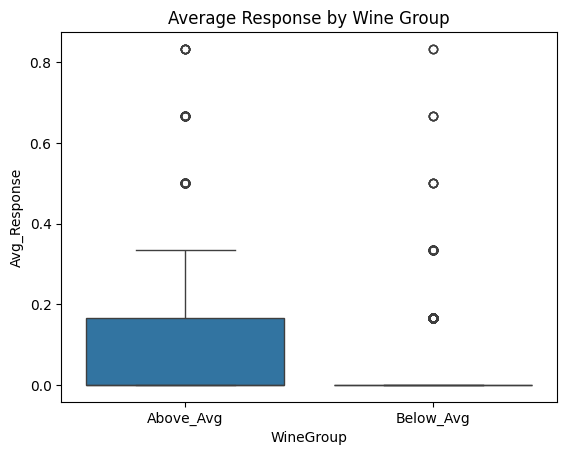

In [116]:
# Visualizing the results
sns.boxplot(x='WineGroup', y='Avg_Response', data=df)
plt.title('Average Response by Wine Group')
plt.show()

### **Hypothesis 2: Customers with children at home have a lower average response rate to the marketing campaigns than those without children.**

* Null Hypothesis: Having children at home does *not* reduce the response rate and may increase it.
* Alternative Hypothesis: People *with* children at home have a *lower* average response rate.

In [117]:
# Separating the customers
with_children = df[df['Total_Children'] > 0]['Avg_Response']
without_children = df[df['Total_Children'] == 0]['Avg_Response']

In [118]:
# Printing the means
print(f"Mean response (with children): {with_children.mean(): .3f}")
print(f"Mean response (without children): {without_children.mean(): .3f}")
print("Sample sizes:", len(with_children), len(without_children))

Mean response (with children):  0.047
Mean response (without children):  0.144
Sample sizes: 1601 638


In [119]:
# Getting the test metrics
t_stat, p_val2 = stats.ttest_ind(with_children, without_children, alternative='less')
print('t-value:', t_stat)
print('p-value:', p_val2)

t-value: -14.679005673340361
p-value: 6.041831041004537e-47


In [120]:
# Setting alpha
alpha2 = 0.05

# Interpreting the results
if p_val2 < alpha:
  print('Reject the null hypothesis: There is evidence supporting the argument that people with children at home have a lower average response rate to marketing campaigns.')
else:
  print('Fail to reject the null hypothesis: There is not enough evidence to support the argument that people with children have a lower response rate')

Reject the null hypothesis: There is evidence supporting the argument that people with children at home have a lower average response rate to marketing campaigns.


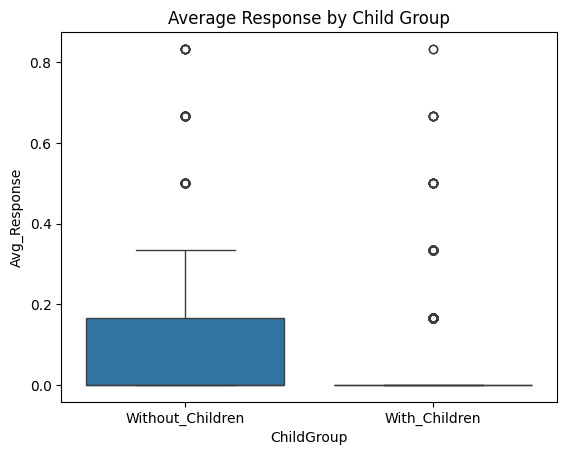

In [121]:
# Visualizing the results
df['ChildGroup'] = np.where(df['Total_Children'] > 0, 'With_Children', 'Without_Children')
sns.boxplot(x='ChildGroup', y='Avg_Response', data=df)
plt.title('Average Response by Child Group')
plt.show()

### **Hypothesis 3: Customers with 10 or more website visits in the last 30 days make fewer purchases than those with 9 or less.**

* Null Hypothesis: There is no difference in average purchases between customers with >= 10 website visits and those with < 10 website visits.
* Alternative Hypothesis: Customers with >= 10 website visits make *fewer* purchases than those with < 10 visits.

In [122]:
# Creating a Total Spend column in the dataframe that aggregates all product category spends
df['Total_Spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [144]:
# Creating dataframes for the two customer bases
high_visits = df[df['NumWebVisitsMonth'] >= 10]['Total_Spend']
low_visits = df[df['NumWebVisitsMonth'] < 10]['Total_Spend']

In [145]:
# Checking the group sizes and their means
print(f"Mean spend (high visits): {high_visits.mean(): .3f}")
print(f"Mean spend (low visits): {low_visits.mean(): .3f}")
print("Sample sizes:", len(high_visits), len(low_visits))

Mean spend (high visits):  119.333
Mean spend (low visits):  607.915
Sample sizes: 12 2227


In [146]:
# Testing the hypothesis
t_val3, p_val3 = stats.ttest_ind(high_visits, low_visits, alternative='less')
print('t-value:', t_val3)
print('p-value:', p_val3)

t-value: -2.808619794470176
p-value: 0.0025093191568594806


In [148]:
# Setting the alpha
alpha3 = 0.05

# Interpreting the results
if p_val3 < alpha3:
  print('Reject the null hypothesis: There is evidence supporting the argument that customers with 10 or more website visits make fewer purchases than those with fewer than 10 visits.')
else:
  print('Fail to reject the null hypothesis: There is not enough evidence to support the argument that customers with 10 or more website visits make fewer purchases than those with fewer than 10 visits.')


Reject the null hypothesis: There is evidence supporting the argument that customers with 10 or more website visits make fewer purchases than those with fewer than 10 visits.


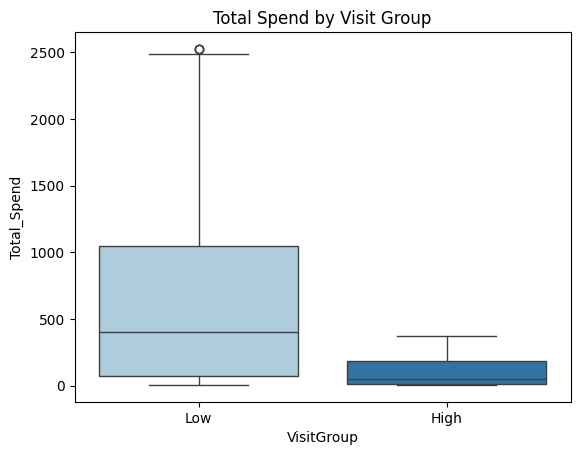

In [150]:
# Visualizing the results
df['VisitGroup'] = np.where(df['NumWebVisitsMonth'] >= 10, 'High', 'Low')
sns.boxplot(x='VisitGroup', y='Total_Spend', data=df, palette = "Paired")
plt.title('Total Spend by Visit Group')
plt.show()